# Marketing Campaign Performance Analysis
# Exploratory Data Analysis

## Introduction

This notebook explores the Marketing Campaign Performance Dataset, which provides valuable insights into the effectiveness of various marketing campaigns. The dataset contains information about campaign types, target audience, duration, channels used, conversion rates, acquisition costs, ROI, locations, languages, clicks, impressions, engagement scores, customer segments, and dates.

The objective of this analysis is to uncover valuable insights regarding various advertising efforts from different channels. The result of this analysis will help with optimizing campaigns and drive targeted growth.

Let's begin the analysis by loading the dataset and performing some initial exploration.

## Project Objectives

1. Campaign Performance Analysis:
    * Conversion Rates: Analyze the conversion rates across different campaign types to identify the most effective strategies.
    * Return on Investment (ROI): Compare ROI for each campaign to determine which campaigns yielded the highest returns relative to costs.
    * Acquisition Costs: Evaluate acquisition costs across different channels and campaigns to understand which is most cost-effective.


2. Audience Segmentation:
    * Target Audience: Group campaigns by target audiences to discover which demographics respond better to certain types of campaigns and channels.
    * Customer Segments: Identify customer segments that show higher engagement scores and conversions, allowing for tailored marketing efforts.

    
3. Channel Effectiveness:
    * Channels Used: Compare the effectiveness of various channels by analyzing conversion rates, engagement scores, and ROI.
    * Duration Impact: Assess whether the duration of a campaign influences its success in terms of engagement and conversion.


4. Geographical Insights:
    * Location-Based Campaigns: Understand how different geographic locations impact the success of marketing campaigns, which can inform regional strategies.


5. Engagement and Impressions:
    * Engagement Scores: Evaluate the correlation between engagement scores and other metrics like conversion rates, acquisition costs, and ROI to refine engagement strategies.
    * Clicks vs Impressions: Explore the relationship between clicks and impressions to measure the effectiveness of each campaign and identify potential areas of improvement.

   
6. Temporal Trends:
    * Date Patterns: Investigate whether certain times of the year are more effective for specific campaign types, channels, or target audiences.


7. Cross-Analysis of Variables:
    * ROI vs. Engagement Score: Analyze how a high engagement score correlates with ROI to determine if engagement is a reliable predictor of financial success.
    * Conversion Rate vs. Acquisition Cost: Examine whether campaigns with higher conversion rates necessarily involve higher acquisition costs, helping to optimize budget allocations.

##### Import libraries and read database

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("week2.xlsx")
df.head()

Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  Channel_Used  Conversion_Rate  Acquisition_Cost   ROI     Location  \
0   Google Ads             0.04             16174  6.29      Chicago   
1   Google Ads             0.12             11566  5.61     New York   
2      YouTube             0.07             10200  7.18  Los Angeles   
3      YouTube             0.11             12724  5.55        Miami   
4      YouTube             0.05             16452  6.50  Los Angeles   

                  Date  Clicks  Impressions  Engagement_Score  \
0  2021-01-01 00:00:00     506         1922                 6   
1  2021-02-01 00:00:00     116         7523                 7   
2  2021-03-01 00:00:00     584         7698                 1   
3  2021-04-01 00:00:00     217         1820                 7   
4  2021-05-01 00:00:00     379         4201                 3   

      Customer_Segment  
0    Health & Wellness  
1         Fashionistas  
2  Outdoor Adventurers  
3    Health & Wellness  
4    Health & Wellness

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200005 non-null  int64  
 1   Company           200005 non-null  object 
 2   Campaign_Type     200005 non-null  object 
 3   Target_Audience   200005 non-null  object 
 4   Duration          200005 non-null  object 
 5   Channel_Used      200005 non-null  object 
 6   Conversion_Rate   200005 non-null  float64
 7   Acquisition_Cost  200005 non-null  int64  
 8   ROI               200005 non-null  float64
 9   Location          200005 non-null  object 
 10  Date              200005 non-null  object 
 11  Clicks            200005 non-null  int64  
 12  Impressions       200005 non-null  int64  
 13  Engagement_Score  200005 non-null  int64  
 14  Customer_Segment  200005 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 22.9+ MB


In [6]:
print(df.dtypes)

Campaign_ID           int64
Company              object
Campaign_Type        object
Target_Audience      object
Duration             object
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost      int64
ROI                 float64
Location             object
Date                 object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
dtype: object


### Columns Definition:

1. Company: The company responsible for the campaign, representing a mix of fictional brands.
2. Campaign_Type: The type of campaign employed, including email, social media, influencer, display, or search.
3. Target_Audience: The specific audience segment targeted by the campaign, such as women aged 25-34, men aged 18-24, or all age groups.
4. Duration: The duration of the campaign, expressed in days.
5. Channels_Used: The channels utilized to promote the campaign, which may include email, social media platforms, YouTube, websites, or Google Ads.
6. Conversion_Rate: The percentage of leads or impressions that converted into desired actions, indicating campaign effectiveness (%).
7. Acquisition_Cost: The cost incurred by the company to acquire customers, presented in monetary format ($).
8. ROI: Return on Investment, representing the profitability and success of the campaign.
9. Location: The geographical location where the campaign was conducted, encompassing major cities like New York, Los Angeles, Chicago, Houston, or Miami.
10. Date: The date on which the campaign occurred, providing a chronological perspective to analyze trends and patterns.
11. Clicks: The number of clicks generated by the campaign, indicating user engagement.
12. Impressions: The total number of times the campaign was displayed or viewed by the target-audience.
13. Engagement_Score: A score ranging from 1 to 10 that measures the level of engagement generated by the campaign.
14. Customer_Segment: The specific customer segment or audience category that the campaign was tailored for, such as tech enthusiasts, fashionistas, health and wellness enthusiasts, foodies, or outdoor adventurers.


## Data Preprocessing & Cleaning

In [7]:
# Convert Target_Audience to string (to avoid errors)
df["Target_Audience"] = df["Target_Audience"].astype(str)

# Now split the column safely
df[['Gender', 'Age_Group']] = df["Target_Audience"].str.split(" ", n=1, expand=True)

# Verify changes
print(df[['Target_Audience', 'Gender', 'Age_Group']].head())


  Target_Audience Gender Age_Group
0       Men 18-24    Men     18-24
1     Women 35-44  Women     35-44
2       Men 25-34    Men     25-34
3        All Ages    All      Ages
4       Men 25-34    Men     25-34


In [8]:
# Remove 'days' and convert to integer
df["Duration"] = df["Duration"].str.replace(" days", "", regex=False).astype(int)

# Verify changes
print(df["Duration"].head())

0    30
1    60
2    30
3    60
4    15
Name: Duration, dtype: int32


In [9]:
# Drop the Target_Audience column
df = df.drop(columns=["Target_Audience"])

# Verify changes
print(df.head())  # Display the first few rows to confirm

   Campaign_ID              Company Campaign_Type  Duration Channel_Used  \
0            1  Innovate Industries         Email        30   Google Ads   
1            2       NexGen Systems         Email        60   Google Ads   
2            3    Alpha Innovations    Influencer        30      YouTube   
3            4   DataTech Solutions       Display        60      YouTube   
4            5       NexGen Systems         Email        15      YouTube   

   Conversion_Rate  Acquisition_Cost   ROI     Location                 Date  \
0             0.04             16174  6.29      Chicago  2021-01-01 00:00:00   
1             0.12             11566  5.61     New York  2021-02-01 00:00:00   
2             0.07             10200  7.18  Los Angeles  2021-03-01 00:00:00   
3             0.11             12724  5.55        Miami  2021-04-01 00:00:00   
4             0.05             16452  6.50  Los Angeles  2021-05-01 00:00:00   

   Clicks  Impressions  Engagement_Score     Customer_Segment 

In [10]:
df.head()

Campaign_ID              Company Campaign_Type  Duration Channel_Used  \
0            1  Innovate Industries         Email        30   Google Ads   
1            2       NexGen Systems         Email        60   Google Ads   
2            3    Alpha Innovations    Influencer        30      YouTube   
3            4   DataTech Solutions       Display        60      YouTube   
4            5       NexGen Systems         Email        15      YouTube   

   Conversion_Rate  Acquisition_Cost   ROI     Location                 Date  \
0             0.04             16174  6.29      Chicago  2021-01-01 00:00:00   
1             0.12             11566  5.61     New York  2021-02-01 00:00:00   
2             0.07             10200  7.18  Los Angeles  2021-03-01 00:00:00   
3             0.11             12724  5.55        Miami  2021-04-01 00:00:00   
4             0.05             16452  6.50  Los Angeles  2021-05-01 00:00:00   

   Clicks  Impressions  Engagement_Score     Customer_Segment Gender Age_Group  
0     506         1922                 6    Health & Wellness    Men     18-24  
1     116         7523                 7         Fashionistas  Women     35-44  
2     584         7698                 1  Outdoor Adventurers    Men     25-34  
3     217         1820                 7    Health & Wellness    All      Ages  
4     379         4201                 3    Health & Wellness    Men     25-34

From the given dataframe above, looks like the data doesn't need further cleaning.

In [11]:
print(df.dtypes)

Campaign_ID           int64
Company              object
Campaign_Type        object
Duration              int32
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost      int64
ROI                 float64
Location             object
Date                 object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
Gender               object
Age_Group            object
dtype: object


From the data above, we can observe the following:

There are no missing values
There are 16 columns and 200005 rows
There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.

In [12]:
# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Convert Acquisition_Cost to numeric (if necessary)
df["Acquisition_Cost"] = df["Acquisition_Cost"].replace('[\$,]', '', regex=True).astype(float)

# Convert necessary columns to category
categorical_cols = ["Company", "Campaign_Type", "Channel_Used", "Location", "Customer_Segment", "Gender", "Age_Group"]
df[categorical_cols] = df[categorical_cols].astype("category")

# Verify changes in data types
print("\nUpdated Data Types:\n", df.dtypes)

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\heptu\AppData\Local\Temp\ipykernel_15944\2399846380.py:5: SyntaxWarning: invalid escape sequence '\$'
  df["Acquisition_Cost"] = df["Acquisition_Cost"].replace('[\$,]', '', regex=True).astype(float)



Updated Data Types:
 Campaign_ID                  int64
Company                   category
Campaign_Type             category
Duration                     int32
Channel_Used              category
Conversion_Rate            float64
Acquisition_Cost           float64
ROI                        float64
Location                  category
Date                datetime64[ns]
Clicks                       int64
Impressions                  int64
Engagement_Score             int64
Customer_Segment          category
Gender                    category
Age_Group                 category
dtype: object


In [13]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


## Initial Data Exploration

In [14]:
# Get basic summary statistics for quantitative columns
quantitative_columns = ["Duration", "Conversion_Rate", "Acquisition_Cost", "ROI", "Clicks", "Impressions", "Engagement_Score"]
summary_stats = df[quantitative_columns].describe()

print("\nSummary Statistics:\n", summary_stats)



Summary Statistics:
             Duration  Conversion_Rate  Acquisition_Cost            ROI  \
count  200005.000000    200005.000000     200005.000000  200005.000000   
mean       37.503862         0.080069      12504.441794       5.002416   
std        16.746620         0.040602       4337.663210       1.734485   
min        15.000000         0.010000       5000.000000       2.000000   
25%        30.000000         0.050000       8740.000000       3.500000   
50%        30.000000         0.080000      12497.000000       5.010000   
75%        45.000000         0.120000      16264.000000       6.510000   
max        60.000000         0.150000      20000.000000       8.000000   

              Clicks    Impressions  Engagement_Score  
count  200005.000000  200005.000000     200005.000000  
mean      549.774591    5507.307107          5.494673  
std       260.019354    2596.863794          2.872593  
min       100.000000    1000.000000          1.000000  
25%       325.000000    3266.00

In [56]:
# Get unique categories in the qualitative columns
qualitative_columns = ["Company", "Campaign_Type", "Channel_Used", "Location", "Customer_Segment", "Gender", "Age_Group"]
for column in qualitative_columns:
    print(f"\nUnique values in {column}:\n", df[column].unique())


Unique values in Company:
 ['Innovate Industries', 'NexGen Systems', 'Alpha Innovations', 'DataTech Solutions', 'TechCorp']
Categories (5, object): ['Alpha Innovations', 'DataTech Solutions', 'Innovate Industries', 'NexGen Systems', 'TechCorp']

Unique values in Campaign_Type:
 ['Email', 'Influencer', 'Display', 'Search', 'Social Media']
Categories (5, object): ['Display', 'Email', 'Influencer', 'Search', 'Social Media']

Unique values in Channel_Used:
 ['Google Ads', 'YouTube', 'Instagram', 'Website', 'Facebook', 'Email']
Categories (6, object): ['Email', 'Facebook', 'Google Ads', 'Instagram', 'Website', 'YouTube']

Unique values in Location:
 ['Chicago', 'New York', 'Los Angeles', 'Miami', 'Houston']
Categories (5, object): ['Chicago', 'Houston', 'Los Angeles', 'Miami', 'New York']

Unique values in Customer_Segment:
 ['Health & Wellness', 'Fashionistas', 'Outdoor Adventurers', 'Foodies', 'Tech Enthusiasts']
Categories (5, object): ['Fashionistas', 'Foodies', 'Health & Wellness', 'O

In [60]:
# 1. Display Unique Values for Various Columns
# Unique values of 'Company'
company_values = df['Company'].value_counts()
print("Total unique categories of Company column:\n", company_values)

# Unique values of 'Campaign_Type'
campaign_values = df['Campaign_Type'].value_counts()
print("Total unique categories of Campaign Type column:\n", campaign_values)

# Unique values of 'Channel_Used'
channels_values = df['Channel_Used'].value_counts()
print("Total unique Channels Used:\n", channels_values)

# Unique values of 'Location'
locations_values = df['Location'].value_counts()
print("Total unique Locations Used:\n", locations_values)

# Unique values of 'Customer_Segment'
customer_segments = df['Customer_Segment'].value_counts()
print("Total number of unique Customer Segments:\n", customer_segments)

# Unique values of 'Gender'
gender = df['Gender'].value_counts() 
print("Total number of unique Gender:\n", gender)

# Unique values of 'Age_Group'
age_groups = df['Age_Group'].value_counts() 
print("Total number of unique Age Groups:\n", age_groups)

Total unique categories of Company column:
 Company
TechCorp               40238
Alpha Innovations      40051
DataTech Solutions     40014
NexGen Systems         39991
Innovate Industries    39711
Name: count, dtype: int64
Total unique categories of Campaign Type column:
 Campaign_Type
Influencer      40170
Search          40157
Display         39988
Email           39871
Social Media    39819
Name: count, dtype: int64
Total unique Channels Used:
 Channel_Used
Email         33599
Google Ads    33440
YouTube       33393
Instagram     33392
Website       33361
Facebook      32820
Name: count, dtype: int64
Total unique Locations Used:
 Location
Miami          40269
New York       40025
Chicago        40013
Los Angeles    39947
Houston        39751
Name: count, dtype: int64
Total number of unique Customer Segments:
 Customer_Segment
Foodies                40210
Tech Enthusiasts       40154
Outdoor Adventurers    40011
Health & Wellness      39888
Fashionistas           39742
Name: count, d

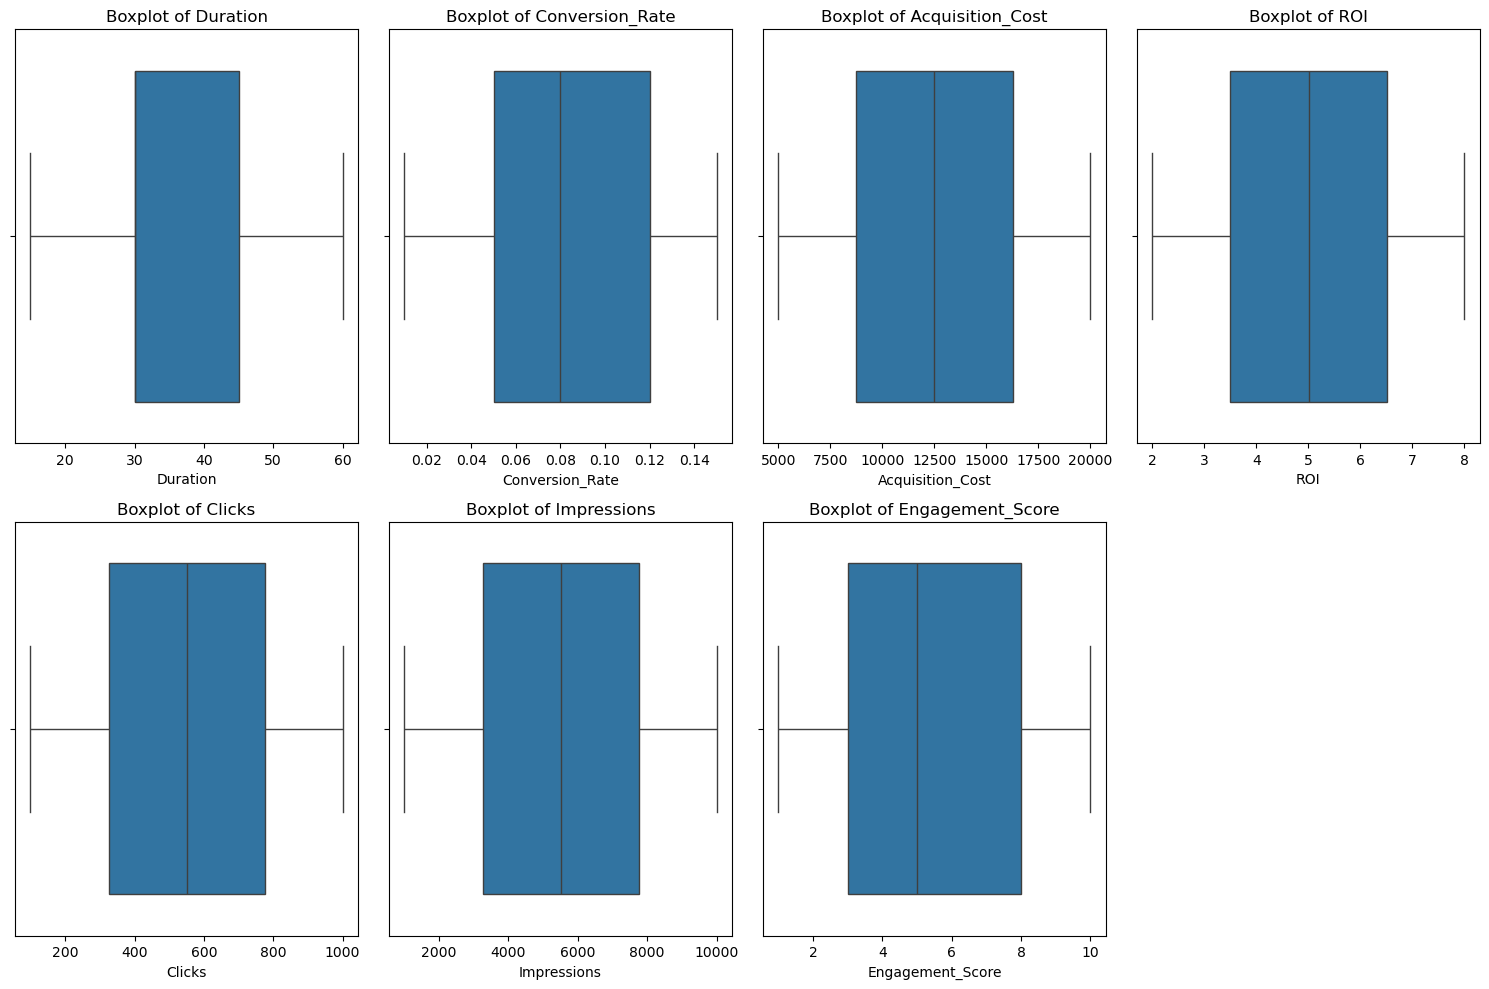

In [16]:
# Plot boxplots to detect outliers in quantitative columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(quantitative_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.savefig("outlier.png")
plt.show()


In [17]:
# Calculate IQR for detecting outliers
Q1 = df[quantitative_columns].quantile(0.25)
Q3 = df[quantitative_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = ((df[quantitative_columns] < (Q1 - 1.5 * IQR)) | (df[quantitative_columns] > (Q3 + 1.5 * IQR)))

# Print the number of outliers
print("\nOutliers detected (True means outlier):\n", outliers.sum())


Outliers detected (True means outlier):
 Duration            0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Clicks              0
Impressions         0
Engagement_Score    0
dtype: int64


In [18]:
# Save the cleaned dataframe to a new Excel file
cleaned_file_path = "Cleaned_week2.xlsx"
df.to_excel(cleaned_file_path, index=False)

# Provide the file path to download the cleaned file
print(f"Cleaned data saved at: {cleaned_file_path}")


Cleaned data saved at: Cleaned_week2.xlsx


In [19]:
dp = pd.read_excel(cleaned_file_path)

In [20]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200005 non-null  int64         
 1   Company           200005 non-null  object        
 2   Campaign_Type     200005 non-null  object        
 3   Duration          200005 non-null  int64         
 4   Channel_Used      200005 non-null  object        
 5   Conversion_Rate   200005 non-null  float64       
 6   Acquisition_Cost  200005 non-null  int64         
 7   ROI               200005 non-null  float64       
 8   Location          200005 non-null  object        
 9   Date              200005 non-null  datetime64[ns]
 10  Clicks            200005 non-null  int64         
 11  Impressions       200005 non-null  int64         
 12  Engagement_Score  200005 non-null  int64         
 13  Customer_Segment  200005 non-null  object        
 14  Gend

#### Key Performance Metrics Calculation

Great! Now that we've explored the data and found no outliers, let's calculate some key performance metrics (KPIs) that are essential for analysing marketing campaign effectiveness.
1. Click-Through Rate (CTR): CTR is calculated as the ratio of clicks to impressions, usually represented as a percentage:
CTR=( Clicks/Impressions)×100
2. Cost Per Click (CPC): CPC is calculated as the total acquisition cost divided by the number of clicks:
CPC=( (Acquisition_Cost)/Clicks)
3. ROI % (ROI Already Provided): The ROI column already exists, but to represent it as a percentage, we simply multiply it by 100:
ROI%=ROI×100
4. Conversion Rate (already exists): The conversion rate is typically the percentage of users who take a desired action after clicking on an ad. We already have this column, but it's useful for reference


Conversion Rates Analysis

In [21]:
# Calculate Click-Through Rate (CTR)
dp["CTR"] = (dp["Clicks"] / dp["Impressions"]) * 100

# Calculate Cost Per Click (CPC)
dp["CPC"] = dp["Acquisition_Cost"] / dp["Clicks"]

# Calculate ROI % (Multiply ROI by 100 to get percentage)
dp["ROI%"] = dp["ROI"] * 100

# Display the first few rows to check the new KPIs
print(dp[["Campaign_ID", "CTR", "CPC", "ROI%", "Conversion_Rate"]].head())


   Campaign_ID        CTR        CPC   ROI%  Conversion_Rate
0            1  26.326743  31.964427  629.0             0.04
1            2   1.541938  99.706897  561.0             0.12
2            3   7.586386  17.465753  718.0             0.07
3            4  11.923077  58.635945  555.0             0.11
4            5   9.021662  43.408971  650.0             0.05


In [22]:
dp.head()

Campaign_ID              Company Campaign_Type  Duration Channel_Used  \
0            1  Innovate Industries         Email        30   Google Ads   
1            2       NexGen Systems         Email        60   Google Ads   
2            3    Alpha Innovations    Influencer        30      YouTube   
3            4   DataTech Solutions       Display        60      YouTube   
4            5       NexGen Systems         Email        15      YouTube   

   Conversion_Rate  Acquisition_Cost   ROI     Location       Date  Clicks  \
0             0.04             16174  6.29      Chicago 2021-01-01     506   
1             0.12             11566  5.61     New York 2021-02-01     116   
2             0.07             10200  7.18  Los Angeles 2021-03-01     584   
3             0.11             12724  5.55        Miami 2021-04-01     217   
4             0.05             16452  6.50  Los Angeles 2021-05-01     379   

   Impressions  Engagement_Score     Customer_Segment Gender Age_Group  \
0         1922                 6    Health & Wellness    Men     18-24   
1         7523                 7         Fashionistas  Women     35-44   
2         7698                 1  Outdoor Adventurers    Men     25-34   
3         1820                 7    Health & Wellness    All      Ages   
4         4201                 3    Health & Wellness    Men     25-34   

         CTR        CPC   ROI%  
0  26.326743  31.964427  629.0  
1   1.541938  99.706897  561.0  
2   7.586386  17.465753  718.0  
3  11.923077  58.635945  555.0  
4   9.021662  43.408971  650.0

In [2]:
# Save the cleaned dataframe to a new Excel file
cleaned_file = "KPI_week2.xlsx"
dp.to_excel(cleaned_file, index=False)
dk = pd.read_excel(cleaned_file)

# Provide the file path to download the cleaned file
print(f"Cleaned data saved at: {cleaned_file}")


NameError: name 'dp' is not defined

In [3]:
dk = pd.read_excel("KPI_week2.xlsx")
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200005 non-null  int64         
 1   Company           200005 non-null  object        
 2   Campaign_Type     200005 non-null  object        
 3   Duration          200005 non-null  int64         
 4   Channel_Used      200005 non-null  object        
 5   Conversion_Rate   200005 non-null  float64       
 6   Acquisition_Cost  200005 non-null  int64         
 7   ROI               200005 non-null  float64       
 8   Location          200005 non-null  object        
 9   Date              200005 non-null  datetime64[ns]
 10  Clicks            200005 non-null  int64         
 11  Impressions       200005 non-null  int64         
 12  Engagement_Score  200005 non-null  int64         
 13  Customer_Segment  200005 non-null  object        
 14  Gend

## Data Visualization

#### Pie Chart (Total Spend by Gender)

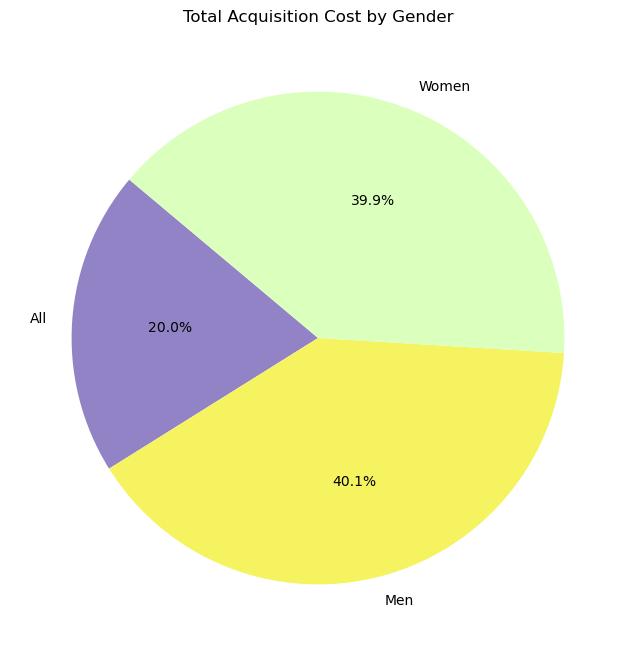

In [19]:
import matplotlib.pyplot as plt

# Ensure numeric conversion
dk[["Acquisition_Cost"]] = dk[["Acquisition_Cost"]].apply(pd.to_numeric, errors="coerce")

# Group by Gender and sum Acquisition Cost
gender_spend = dk.groupby("Gender")["Acquisition_Cost"].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_spend, labels=gender_spend.index, autopct="%1.1f%%", colors=["#9283c7", "#f5f360", "#dbffbd"], startangle=140)
plt.title("Total Acquisition Cost by Gender")
plt.savefig("a.png")
plt.show()


In [20]:
import pandas as pd

# Ensure numeric conversion
dk["Acquisition_Cost"] = pd.to_numeric(dk["Acquisition_Cost"], errors="coerce")

# Group by Gender and sum Acquisition Cost
gender_spend = dk.groupby("Gender")["Acquisition_Cost"].sum().reset_index()

# Rename columns for clarity
gender_spend.columns = ["Gender", "Total_Spent"]

# Display the table
print(gender_spend)

# Save to CSV (optional)
gender_spend.to_csv("gender_spending.csv", index=False)


  Gender  Total_Spent
0    All    500351006
1    Men   1003696332
2  Women    996903543


#### Distribution of Channel Usage

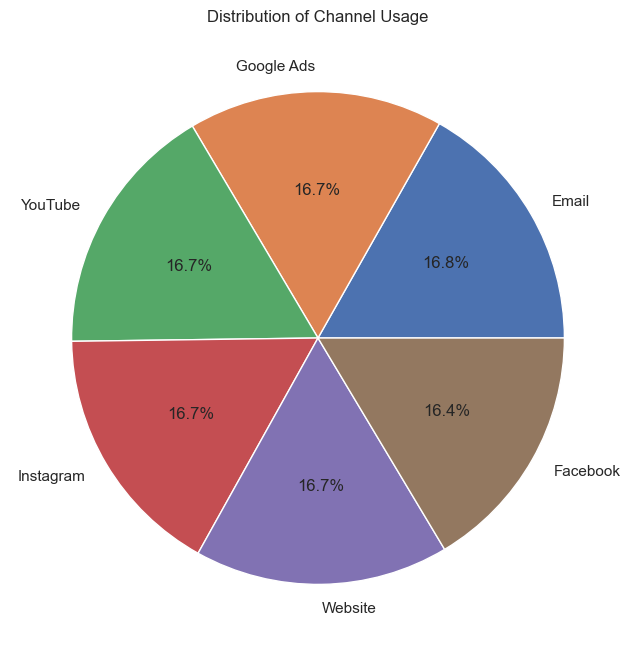

In [62]:
# Count the occurrences of each channel used
channel_counts = dk['Channel_Used'].value_counts()

# Create a pie chart to visualize the distribution of channel usage
plt.figure(figsize=(8, 8))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Channel Usage')
plt.show()

#### Campaign type and channel used

C:\Users\heptu\AppData\Local\Temp\ipykernel_15944\539736562.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=performance_by_channel, x='Campaign_Type', y='ROI', hue='Channel_Used', ci=None, palette='viridis')


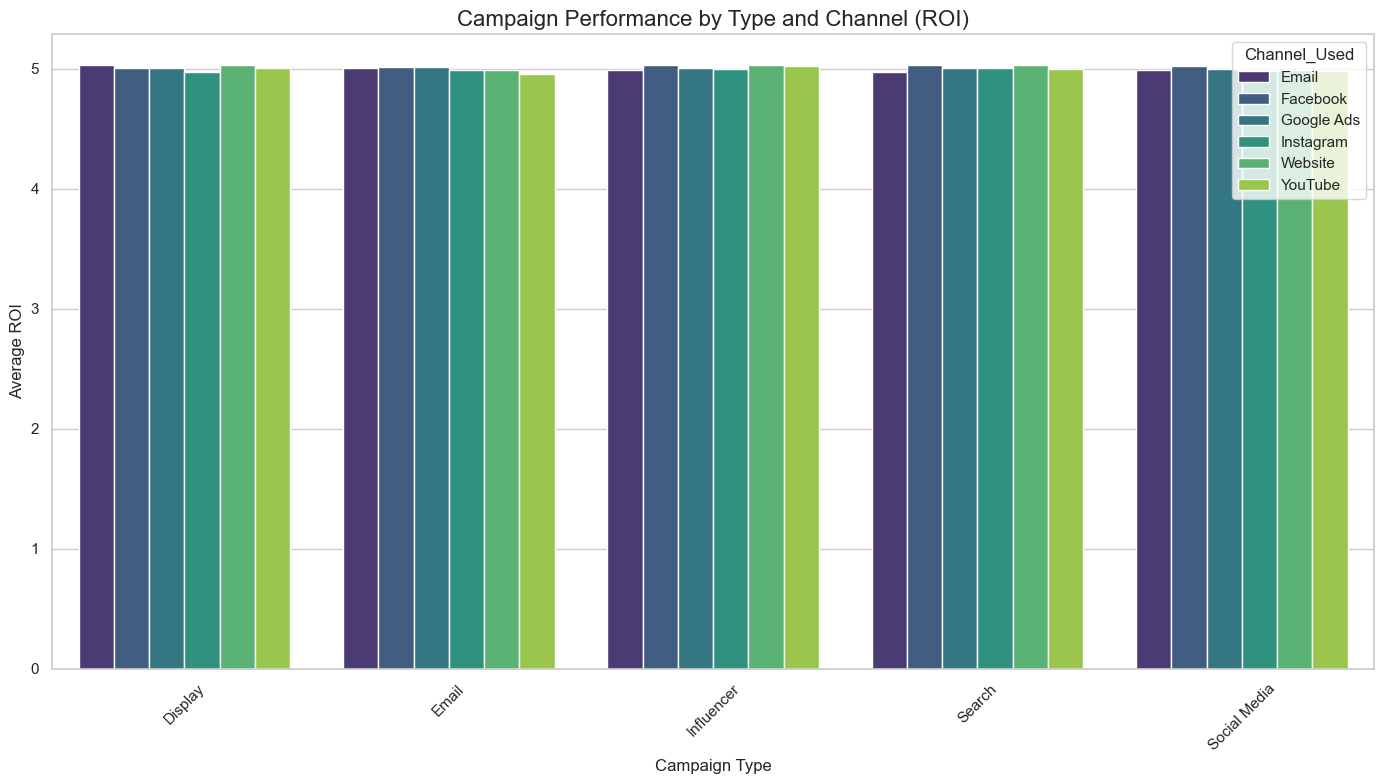

In [45]:
# Group by Campaign Type and Channel Used to analyze performance metrics
performance_by_channel = dk.groupby(['Campaign_Type', 'Channel_Used']).agg({
    'ROI': 'mean',
    'CTR': 'mean',
    'CPC': 'mean',
    'Conversion_Rate': 'mean',
    'Clicks': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Visualize performance by campaign type and channel used
plt.figure(figsize=(14, 8))
sns.barplot(data=performance_by_channel, x='Campaign_Type', y='ROI', hue='Channel_Used', ci=None, palette='viridis')
plt.title("Campaign Performance by Type and Channel (ROI)", fontsize=16)
plt.xlabel("Campaign Type", fontsize=12)
plt.ylabel("Average ROI", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Conversion Rates Analysis

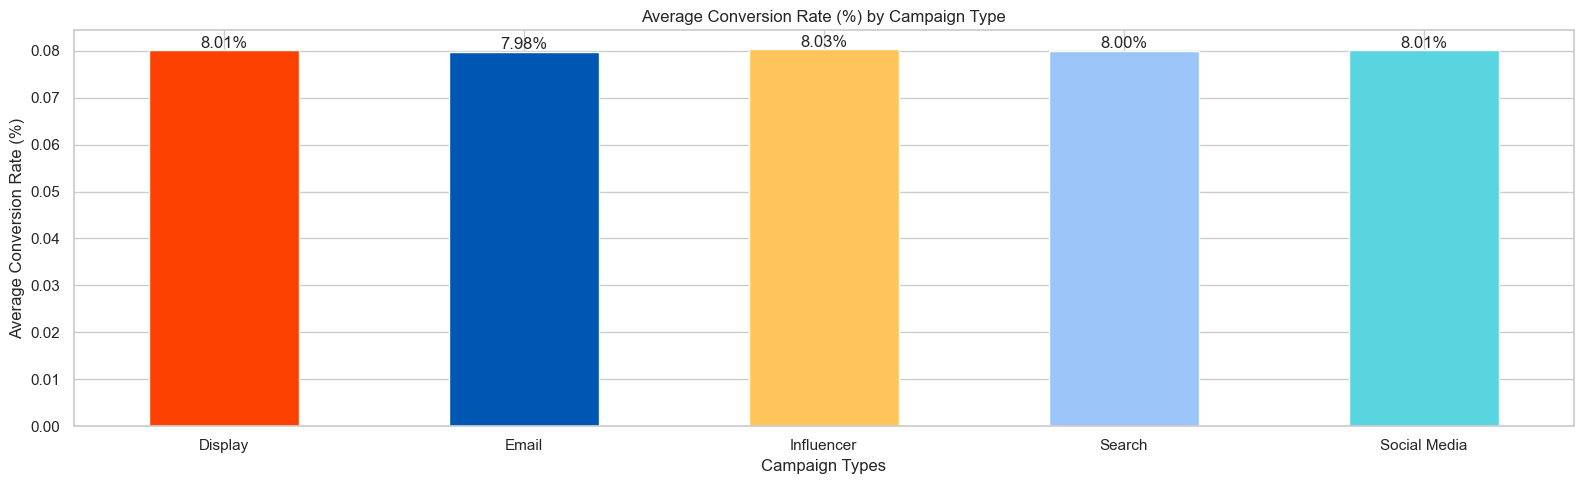

In [73]:
# Average Conversion Rate across different Campaign Type
avg_conversion_rate_by_campaign_type = dk.groupby(['Campaign_Type'])['Conversion_Rate'].mean()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0']

# Plot data as a bar chart
bars = avg_conversion_rate_by_campaign_type.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Average Conversion Rate (%) by Campaign Type')
plt.xlabel('Campaign Types')
plt.xticks(rotation=0)
plt.ylabel('Average Conversion Rate (%)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:,.2%}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

#### Bar Chart: Campaign Performance by Campaign Type

C:\Users\heptu\AppData\Local\Temp\ipykernel_15944\4127908535.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dk, x="Campaign_Type", y="ROI", ci=None, palette="viridis")
C:\Users\heptu\AppData\Local\Temp\ipykernel_15944\4127908535.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dk, x="Campaign_Type", y="ROI", ci=None, palette="viridis")


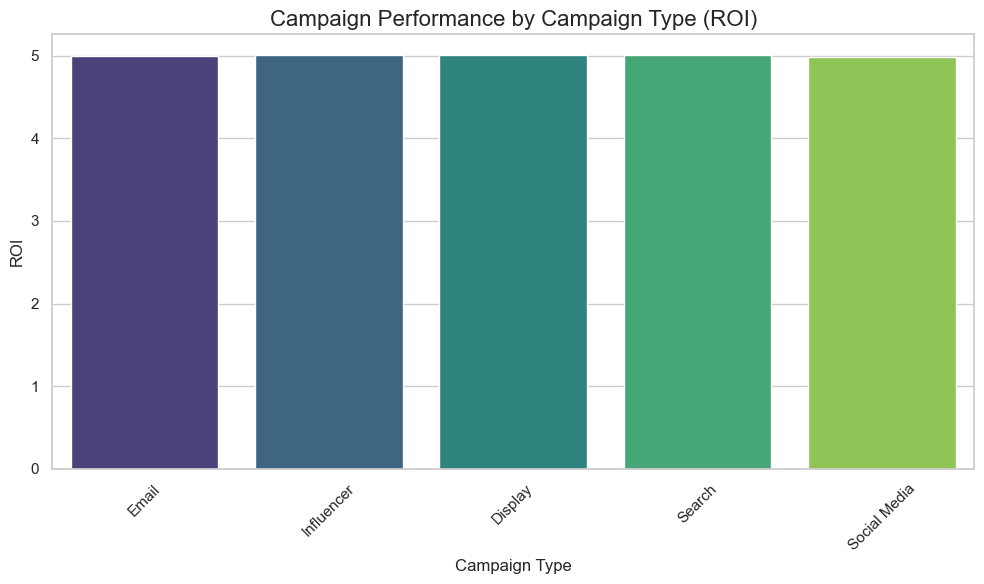

In [35]:
# Set up the plot style
sns.set(style="whitegrid")

# Bar Chart: Campaign Performance by Campaign Type (based on ROI)
plt.figure(figsize=(10, 6))
sns.barplot(data=dk, x="Campaign_Type", y="ROI", ci=None, palette="viridis")
plt.title("Campaign Performance by Campaign Type (ROI)", fontsize=16)
plt.xlabel("Campaign Type", fontsize=12)
plt.ylabel("ROI", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Return On Investment (ROI) Analysis

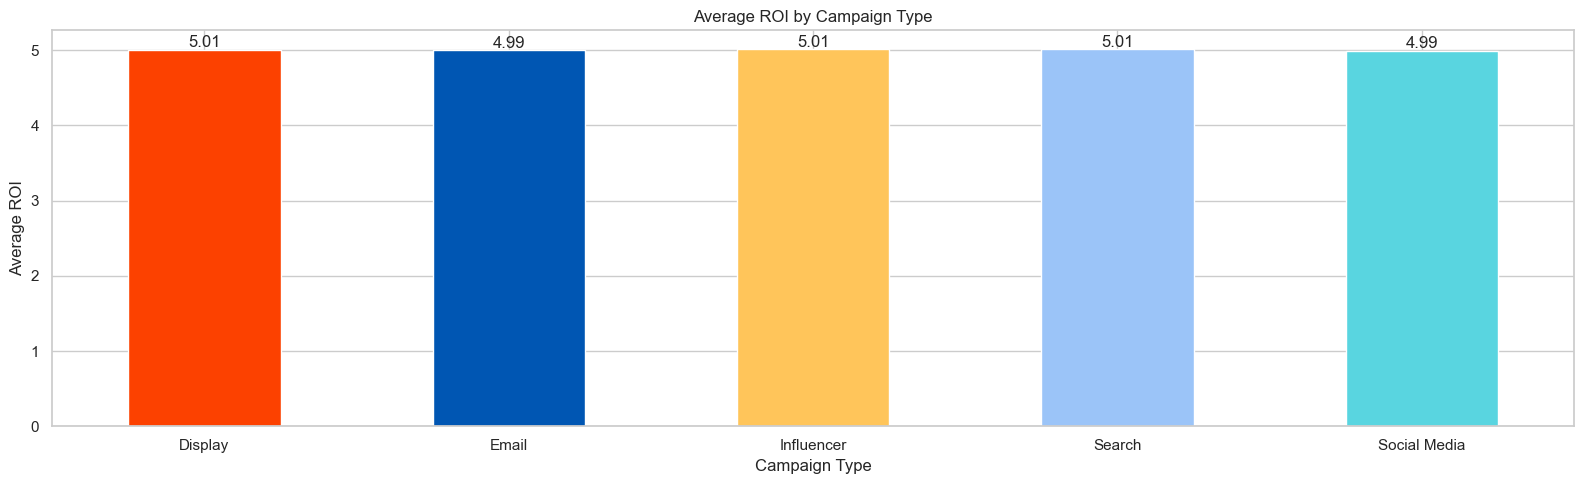

In [75]:
# Average Return on Investment (ROI) for each Campaign Type
avg_roi_by_campaign_type = dk.groupby(['Campaign_Type'])['ROI'].mean()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0']

# Plot data as a bar chart
bars = avg_roi_by_campaign_type.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Average ROI by Campaign Type')
plt.xlabel('Campaign Type')
plt.xticks(rotation=0)
plt.ylabel('Average ROI')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:,.3}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


#### Box Chart: Campaign Performance by Campaign Type

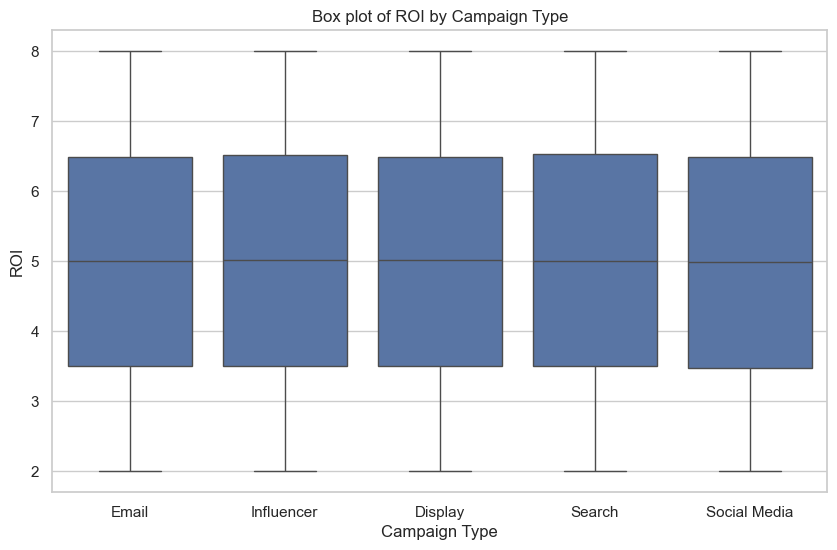

In [67]:
# Box plot of ROI by Campaign Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=dk, x='Campaign_Type', y='ROI')
plt.title('Box plot of ROI by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('ROI')
plt.show()

#### Box Plot: Distribution of Acquisition Cost by Campaign Type

C:\Users\heptu\AppData\Local\Temp\ipykernel_15944\1056581658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dk, x='Campaign_Type', y='Acquisition_Cost', palette="Set2")


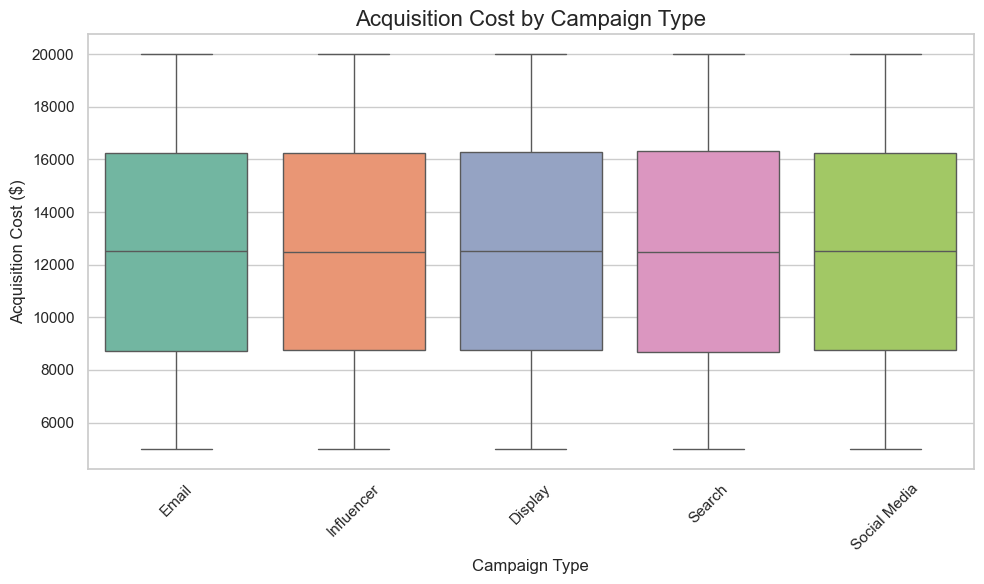

In [43]:
# Box Plot: Acquisition Cost by Campaign Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=dk, x='Campaign_Type', y='Acquisition_Cost', palette="Set2")
plt.title("Acquisition Cost by Campaign Type", fontsize=16)
plt.xlabel("Campaign Type", fontsize=12)
plt.ylabel("Acquisition Cost ($)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 #### Acquisition Costs Analysis

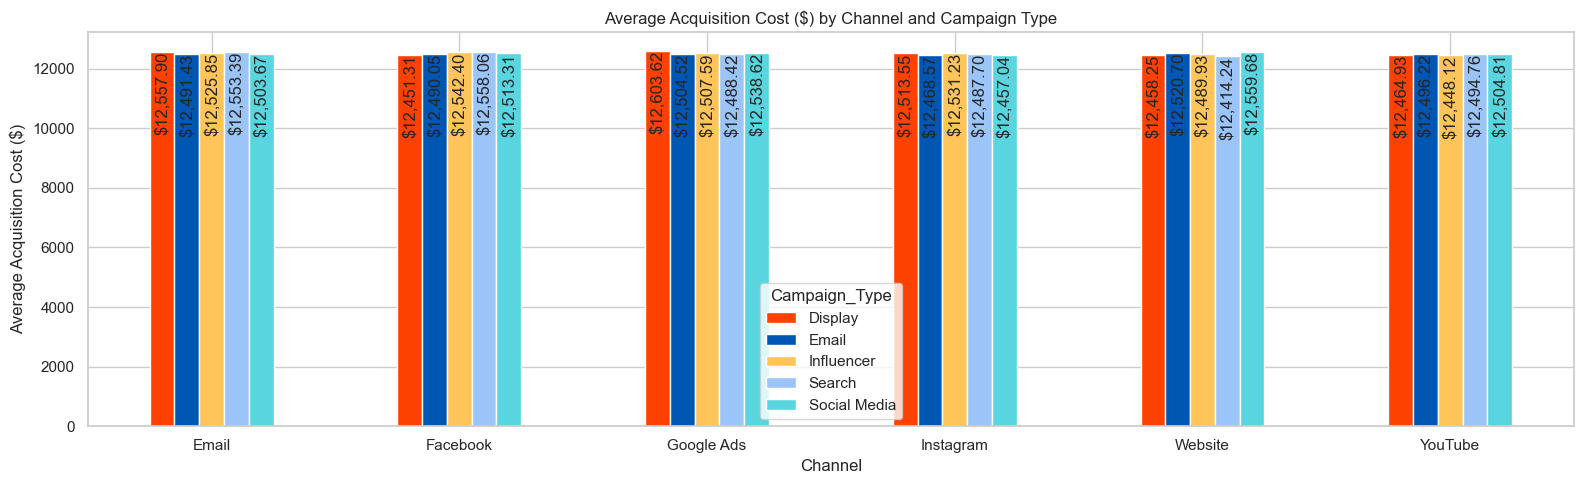

In [77]:
# Average Acquisition Cost across different Channel and Campaign Type
avg_acquisition_cost_by_channel_and_campaign_type = dk.groupby(['Channel_Used', 'Campaign_Type'])['Acquisition_Cost'].mean().unstack()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C']

# Plot data as a bar chart
bars = avg_acquisition_cost_by_channel_and_campaign_type.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Average Acquisition Cost ($) by Channel and Campaign Type')
plt.xlabel('Channel')
plt.xticks(rotation=0)
plt.ylabel('Average Acquisition Cost ($)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, -30),
                  textcoords='offset points',
                  rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

#### High-Performing and Underperforming Campaigns Based on ROI

C:\Users\heptu\AppData\Local\Temp\ipykernel_15944\789020808.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_performing_by_type.reset_index(), x='Campaign_Type', y='ROI', palette='Blues_d')


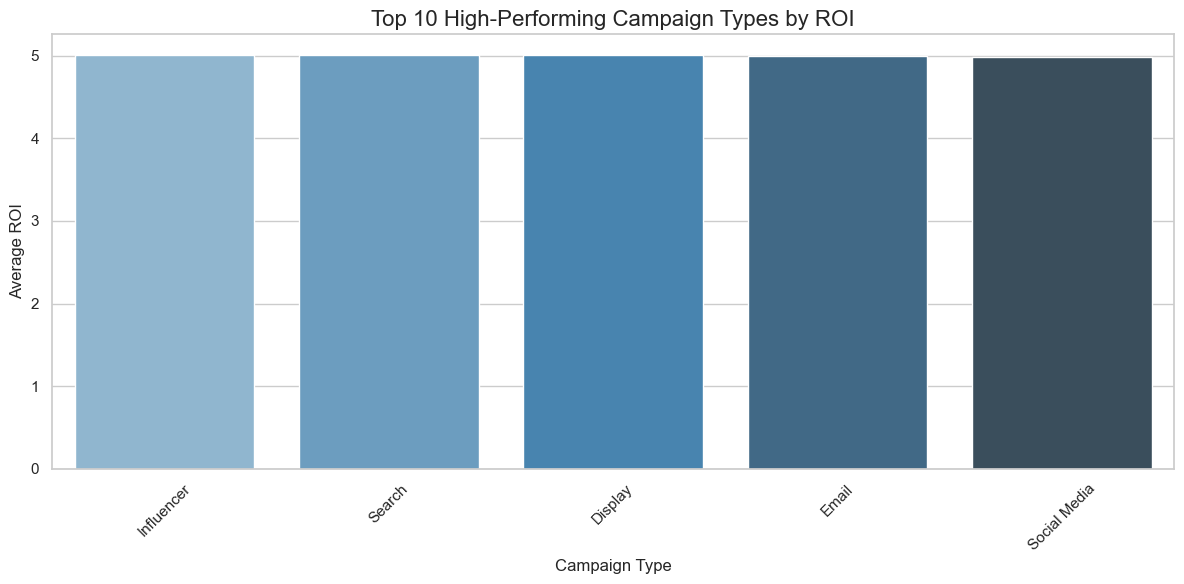

C:\Users\heptu\AppData\Local\Temp\ipykernel_15944\789020808.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=underperforming_by_type.reset_index(), x='Campaign_Type', y='ROI', palette='Reds_d')


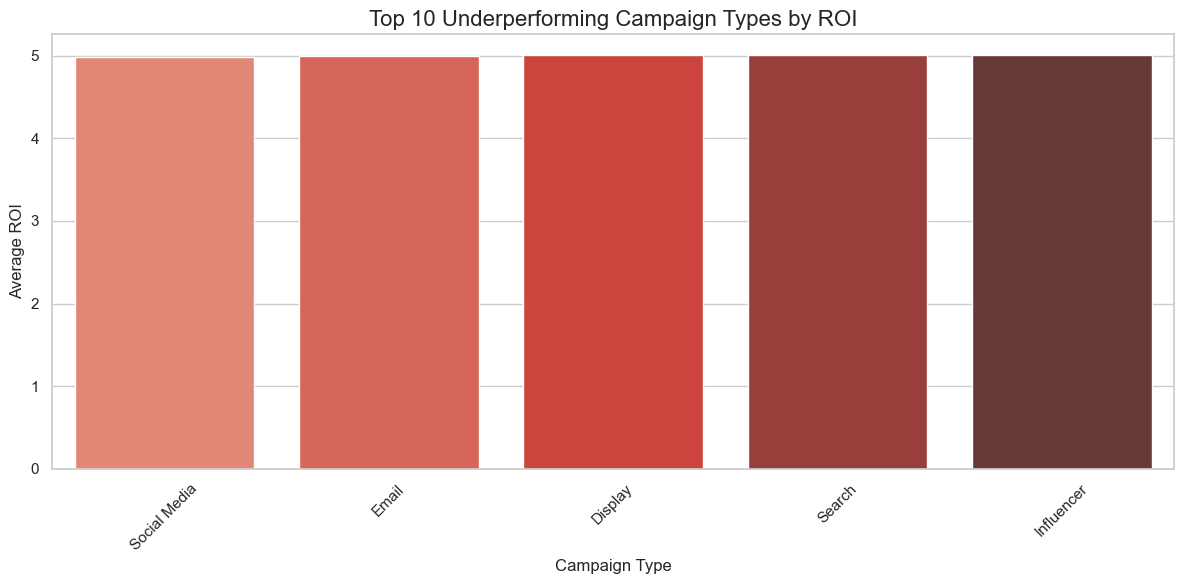

In [49]:
# Sort campaigns by ROI and select the top and bottom 10 based on Campaign Type
high_performing_by_type = dk.groupby('Campaign_Type').agg({'ROI': 'mean'}).sort_values(by='ROI', ascending=False).head(10)
underperforming_by_type = dk.groupby('Campaign_Type').agg({'ROI': 'mean'}).sort_values(by='ROI').head(10)

# Visualizing the top 10 high-performing campaigns by ROI using Campaign Type
plt.figure(figsize=(12, 6))
sns.barplot(data=high_performing_by_type.reset_index(), x='Campaign_Type', y='ROI', palette='Blues_d')
plt.title("Top 10 High-Performing Campaign Types by ROI", fontsize=16)
plt.xlabel("Campaign Type", fontsize=12)
plt.ylabel("Average ROI", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizing the top 10 underperforming campaigns by ROI using Campaign Type
plt.figure(figsize=(12, 6))
sns.barplot(data=underperforming_by_type.reset_index(), x='Campaign_Type', y='ROI', palette='Reds_d')
plt.title("Top 10 Underperforming Campaign Types by ROI", fontsize=16)
plt.xlabel("Campaign Type", fontsize=12)
plt.ylabel("Average ROI", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Heatmap: Correlation Between Key Metrics

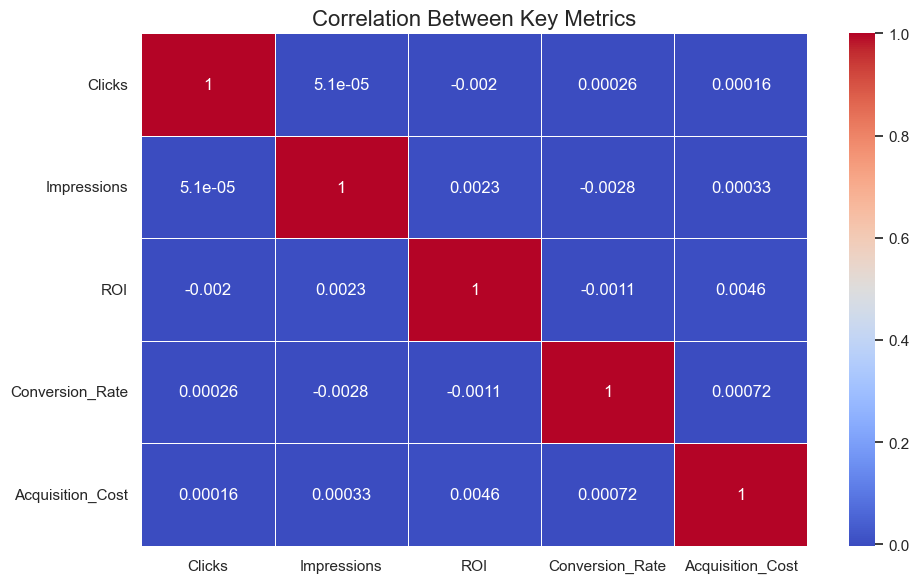

In [37]:
# Calculate correlation matrix
correlation_matrix = dk[["Clicks", "Impressions", "ROI", "Conversion_Rate", "Acquisition_Cost"]].corr()

# Heatmap: Correlation between key metrics
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Key Metrics", fontsize=16)
plt.tight_layout()
plt.show()


#### Line Graph: Monthly Trend of Conversion Rate

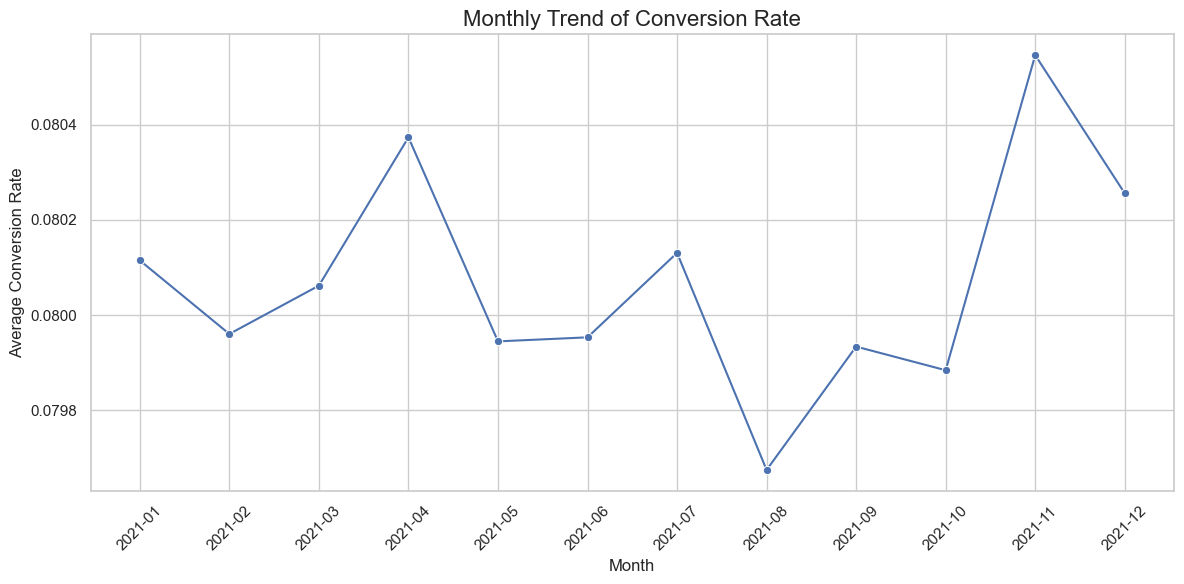

In [40]:
# Ensure that 'Year_Month' is a string type
dk['Year_Month'] = dk['Year_Month'].astype(str)

# Re-calculate the monthly conversion rate
monthly_conversion_rate = dk.groupby('Year_Month')['Conversion_Rate'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_conversion_rate, x='Year_Month', y='Conversion_Rate', marker='o')
plt.title("Monthly Trend of Conversion Rate", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Conversion Rate", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



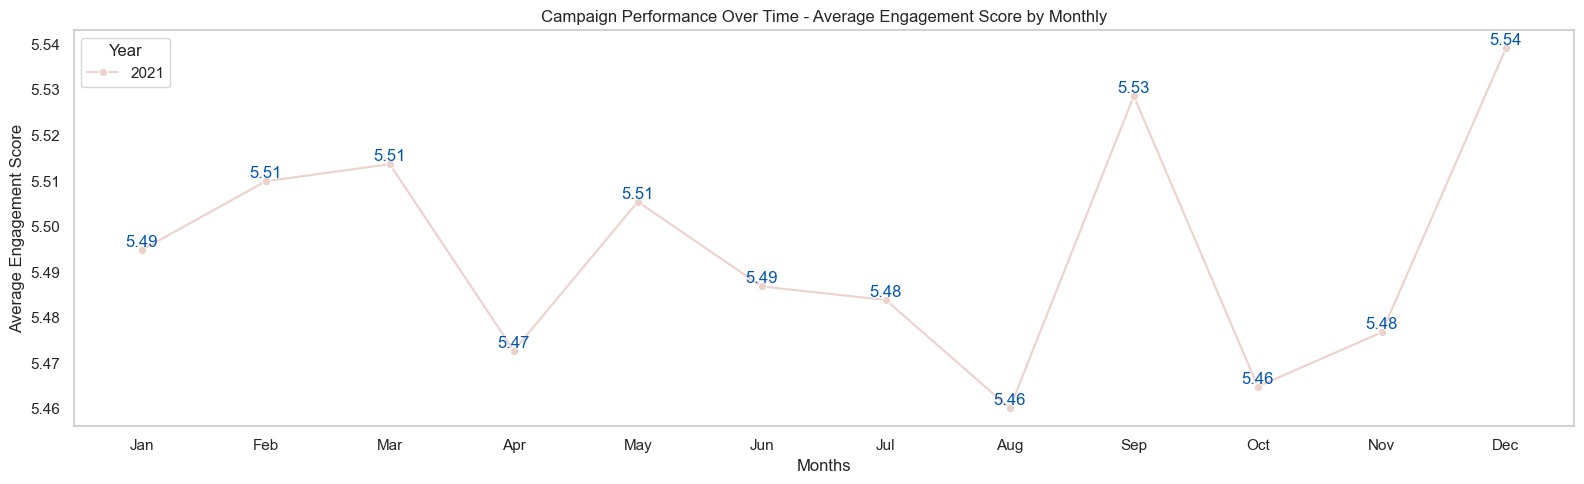

In [82]:
# Extract year and month for temporal analysis
dk['Year'] = dk['Date'].dt.year
dk['Month'] = dk['Date'].dt.month

# Aggregate data by month to analyze campaign performance over time
campaign_monthly_performance = dk.groupby(['Year', 'Month']).agg({
    'Engagement_Score': 'mean',
    'Conversion_Rate': 'mean', 
    'ROI': 'mean'
}).reset_index()
# Lineplot for Average Engagement Score
plt.figure(figsize=(16, 5))
lineplot = sns.lineplot(x='Month', y='Engagement_Score', hue='Year', data=campaign_monthly_performance, marker='o')

# Adding data labels to each point
for line in lineplot.lines:
    for x_data, y_data in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x_data, 
                 y_data, 
                 f'{y_data:.2f}', 
                 ha='center', 
                 va='bottom', 
                 color='#0056B3')

# Add title and labels
plt.title('Campaign Performance Over Time - Average Engagement Score by Monthly')
plt.xlabel('Months')
plt.ylabel('Average Engagement Score')

# Show month names on x-axis
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Disable grid
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


#### Histogram Graph: Conversion Rate

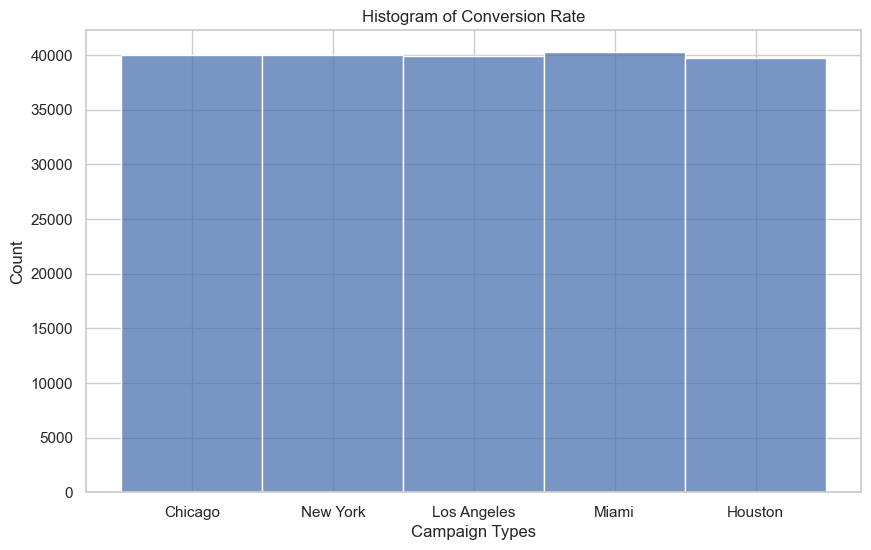

In [65]:
# Histogram of Conversion Rate
plt.figure(figsize=(10, 6))
sns.histplot(data=dk, x='Location')
plt.title('Histogram of Conversion Rate')
plt.xlabel('Campaign Types')
plt.ylabel('Count')
plt.show()

#### Density Plot: Distribution of Conversion Rate

C:\Users\heptu\AppData\Local\Temp\ipykernel_15944\2021896299.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dk['Conversion_Rate'], shade=True, color='blue')


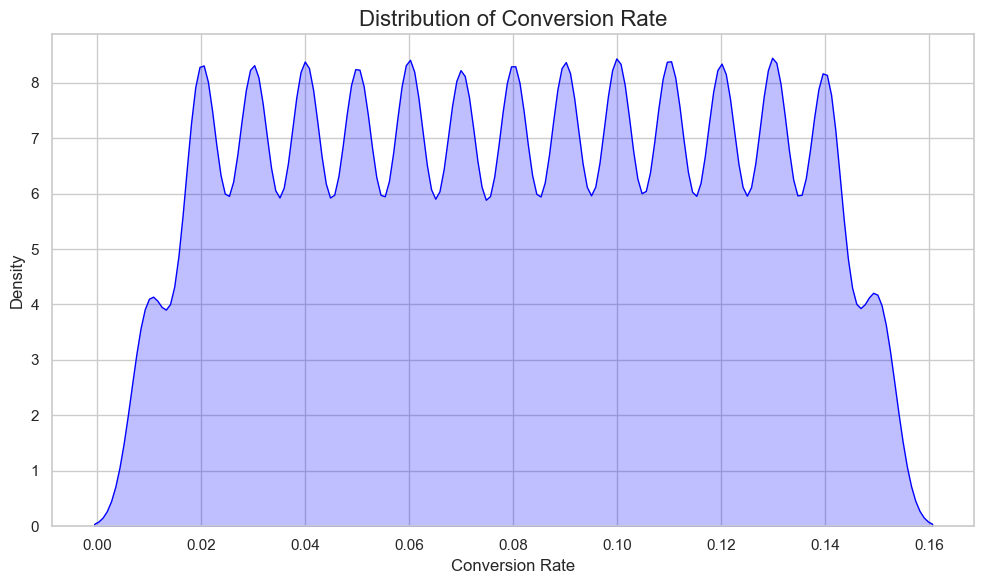

In [42]:
# Density Plot: Distribution of Conversion Rate
plt.figure(figsize=(10, 6))
sns.kdeplot(dk['Conversion_Rate'], shade=True, color='blue')
plt.title("Distribution of Conversion Rate", fontsize=16)
plt.xlabel("Conversion Rate", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.tight_layout()
plt.show()


 #### Scatter Plot: ROI vs Acquisition Cost

C:\Users\heptu\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


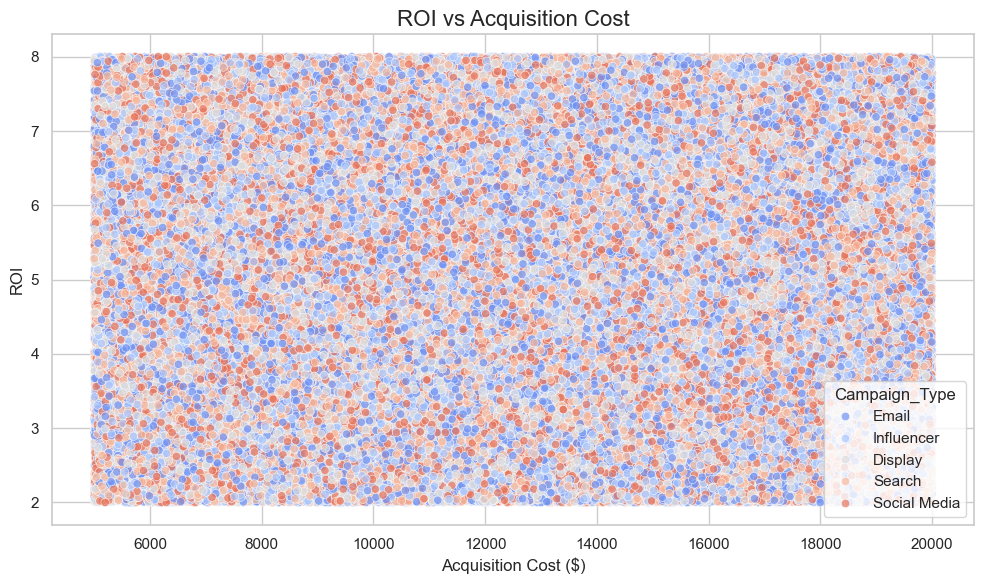

In [36]:
# Scatter Plot: ROI vs Acquisition Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dk, x="Acquisition_Cost", y="ROI", hue="Campaign_Type", palette="coolwarm", alpha=0.7)
plt.title("ROI vs Acquisition Cost", fontsize=16)
plt.xlabel("Acquisition Cost ($)", fontsize=12)
plt.ylabel("ROI", fontsize=12)
plt.tight_layout()
plt.show()


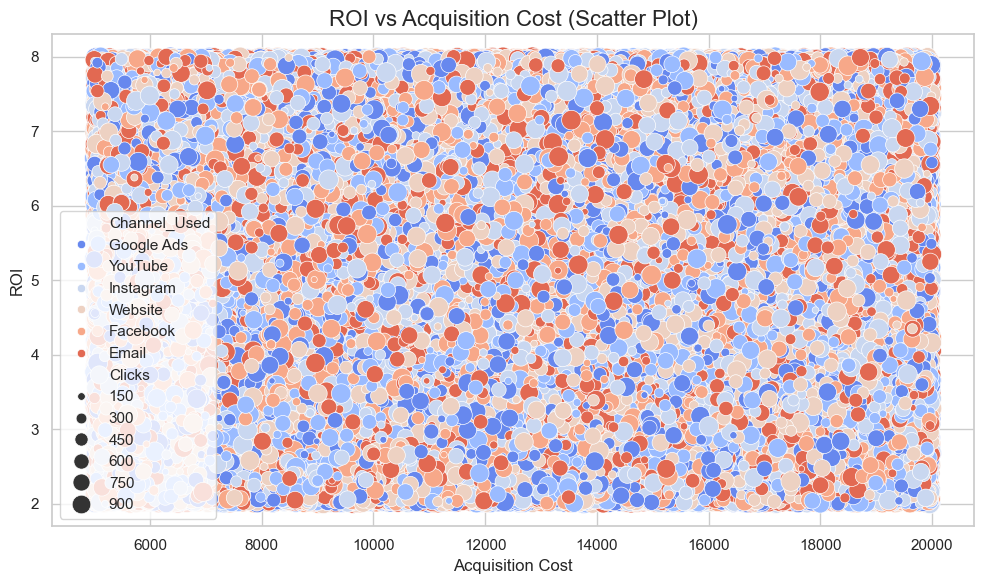

In [53]:
# Scatter Plot: ROI vs Acquisition Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dk, x='Acquisition_Cost', y='ROI', hue='Channel_Used', size='Clicks', sizes=(20, 200), palette='coolwarm')
plt.title("ROI vs Acquisition Cost (Scatter Plot)", fontsize=16)
plt.xlabel("Acquisition Cost", fontsize=12)
plt.ylabel("ROI", fontsize=12)
plt.tight_layout()
plt.show()

#### Scatter Plot: Clicks vs Impressions

C:\Users\heptu\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


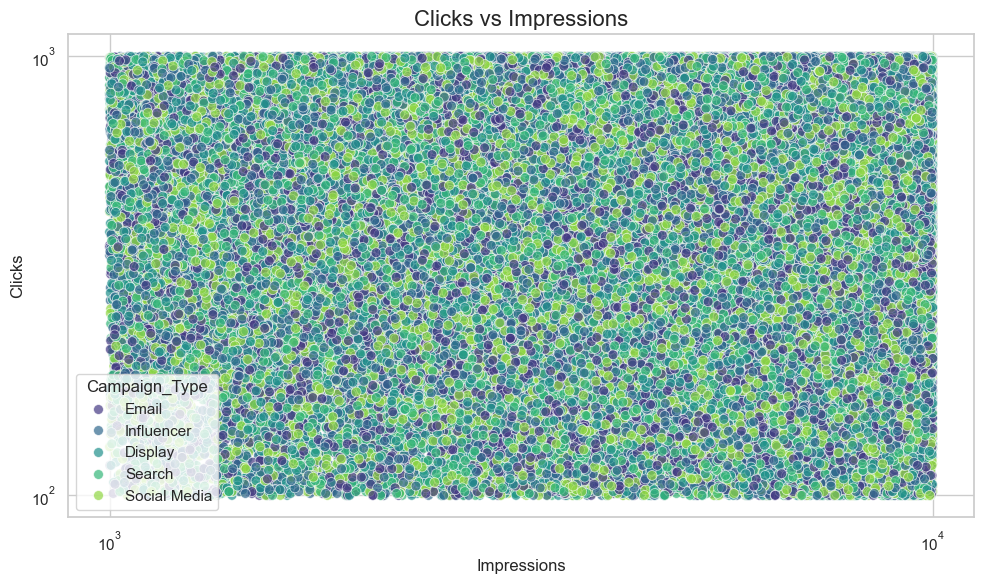

In [44]:
# Scatter Plot: Clicks vs Impressions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dk, x="Impressions", y="Clicks", hue="Campaign_Type", palette="viridis", s=50, alpha=0.7)
plt.title("Clicks vs Impressions", fontsize=16)
plt.xlabel("Impressions", fontsize=12)
plt.ylabel("Clicks", fontsize=12)
plt.xscale('log')  # Use log scale for better readability if there are large variations
plt.yscale('log')  # Use log scale for better readability if needed
plt.tight_layout()
plt.show()


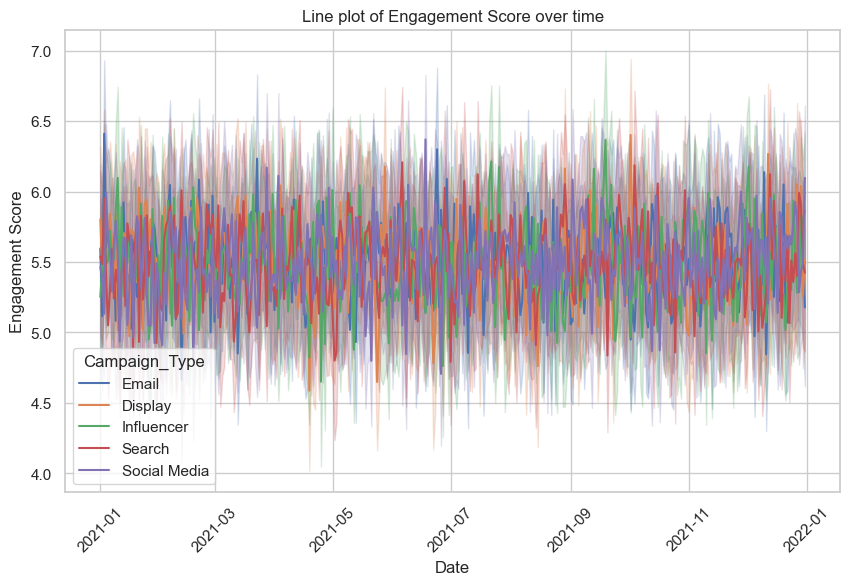

In [69]:
# Line plot of Engagement Score over time
dk_sorted = dk.sort_values('Date')
plt.figure(figsize=(10, 6))
sns.lineplot(data=dk_sorted, x='Date', y='Engagement_Score', hue='Campaign_Type')
plt.title('Line plot of Engagement Score over time')
plt.xlabel('Date')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)
plt.show()

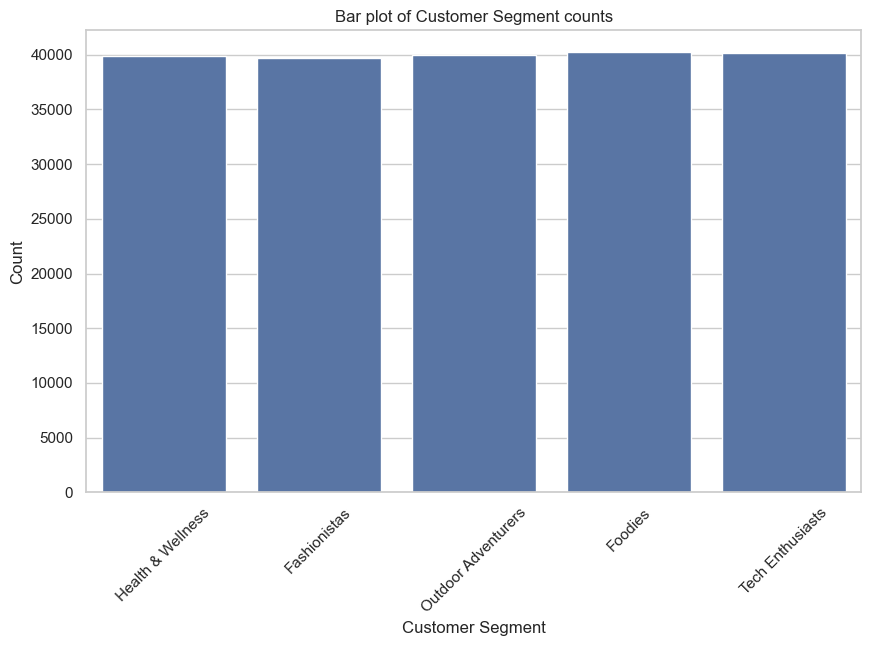

In [68]:
# Bar plot of Customer Segment counts
plt.figure(figsize=(10, 6))
sns.countplot(data=dk, x='Customer_Segment')
plt.title('Bar plot of Customer Segment counts')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

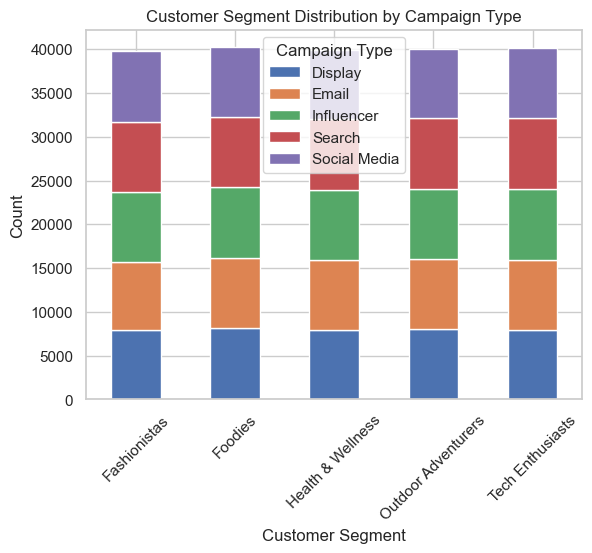

In [72]:
# Create a cross-tabulation of customer segments and campaign types
segment_campaign = pd.crosstab(dk['Customer_Segment'], dk['Campaign_Type'])

# Create a stacked bar chart to visualize the distribution of customer segments across campaign types
plt.figure(figsize=(10, 6))
segment_campaign.plot(kind='bar', stacked=True)
plt.title('Customer Segment Distribution by Campaign Type')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Campaign Type')
plt.show()

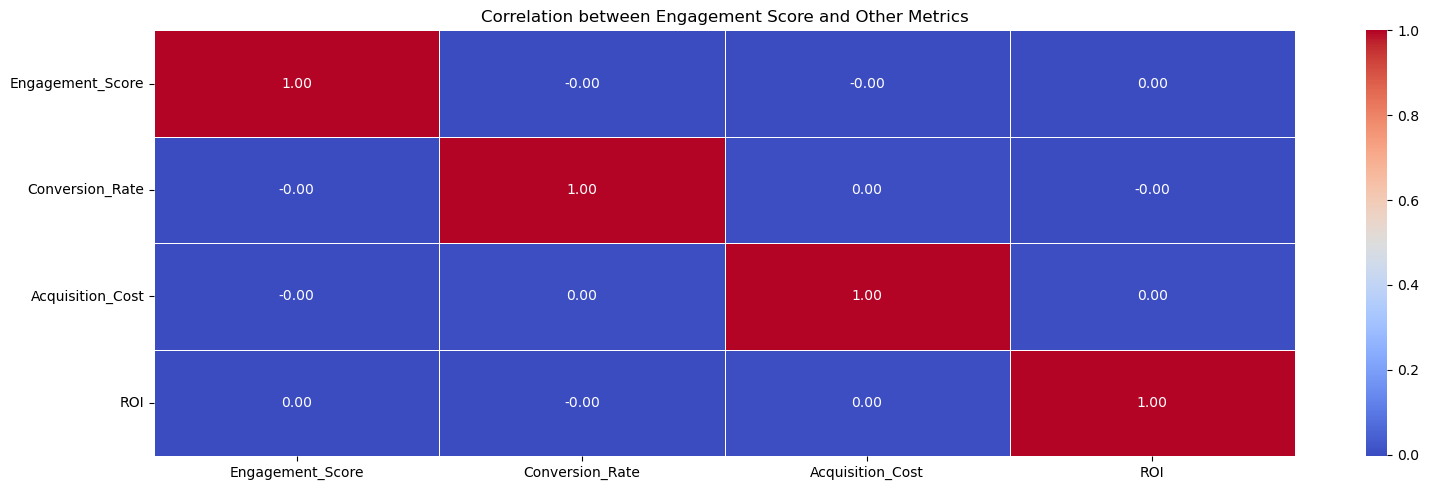

In [15]:
# Select the relevant columns for correlation analysis
metrics = dk[['Engagement_Score', 'Conversion_Rate', 'Acquisition_Cost', 'ROI']]

# Calculate the correlation matrix
correlation_matrix = metrics.corr()

# Plot the heatmap to visualize correlations
plt.figure(figsize=(16, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Engagement Score and Other Metrics')
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.savefig("c.png")
plt.show()

#### Target Audienece Analysis

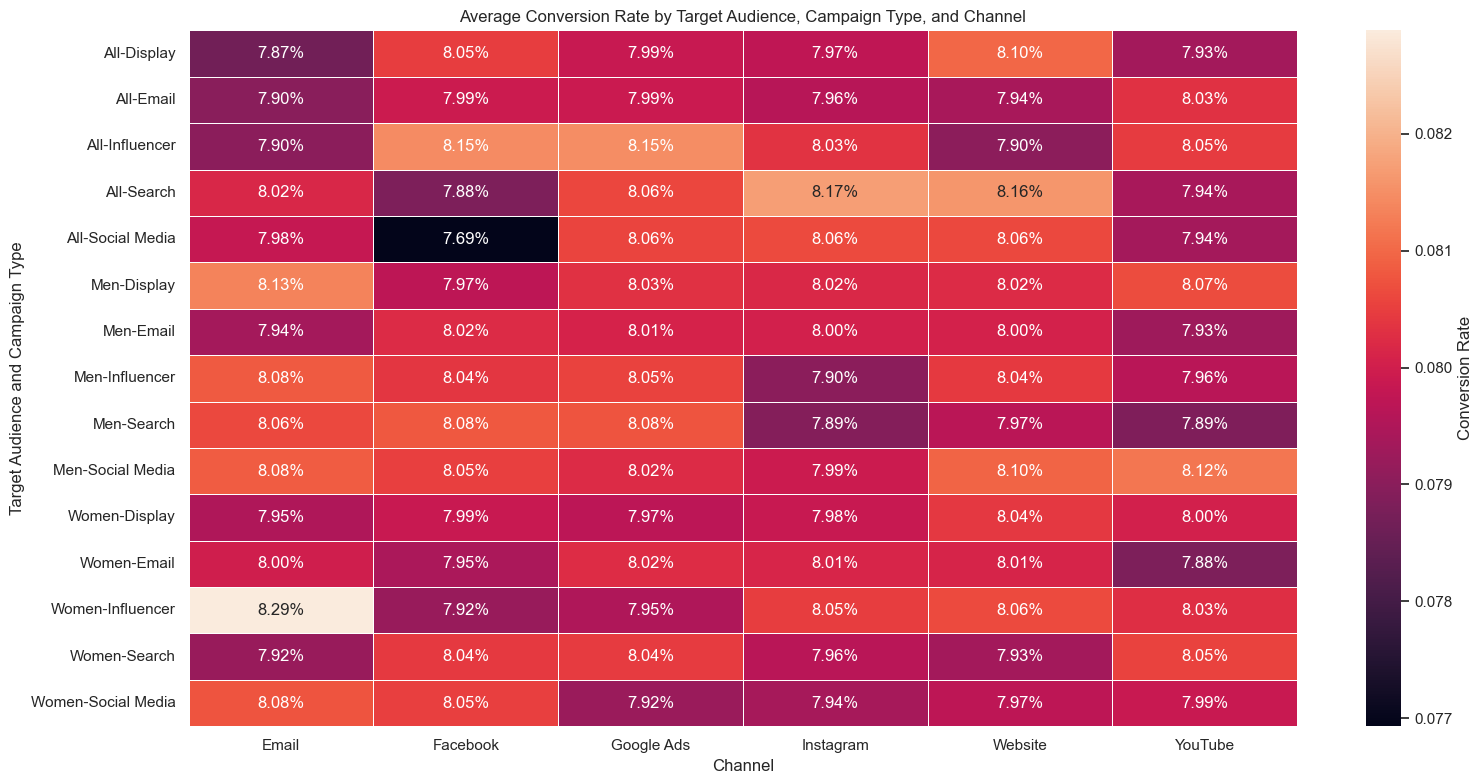

In [78]:
# Average Conversion Rate by Target Audience, Campaign Type, and Channel
avg_conversion_rate_by_3_fields = dk.groupby(['Gender', 'Campaign_Type', 'Channel_Used'])['Conversion_Rate'].mean().unstack()

# Plot data as a heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(avg_conversion_rate_by_3_fields, annot=True, fmt='.2%', linewidths=0.5, cbar_kws={'label': 'Conversion Rate'})

# Add title and labels
plt.title('Average Conversion Rate by Target Audience, Campaign Type, and Channel')
plt.xlabel('Channel')
plt.xticks(rotation=0)
plt.ylabel('Target Audience and Campaign Type')

# Show plot
plt.tight_layout()
plt.show()

C:\Users\heptu\AppData\Local\Temp\ipykernel_15944\1879537614.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_conversion_rate_by_3_fields = df.groupby(['Age_Group', 'Campaign_Type', 'Channel_Used'])['Conversion_Rate'].mean().unstack()


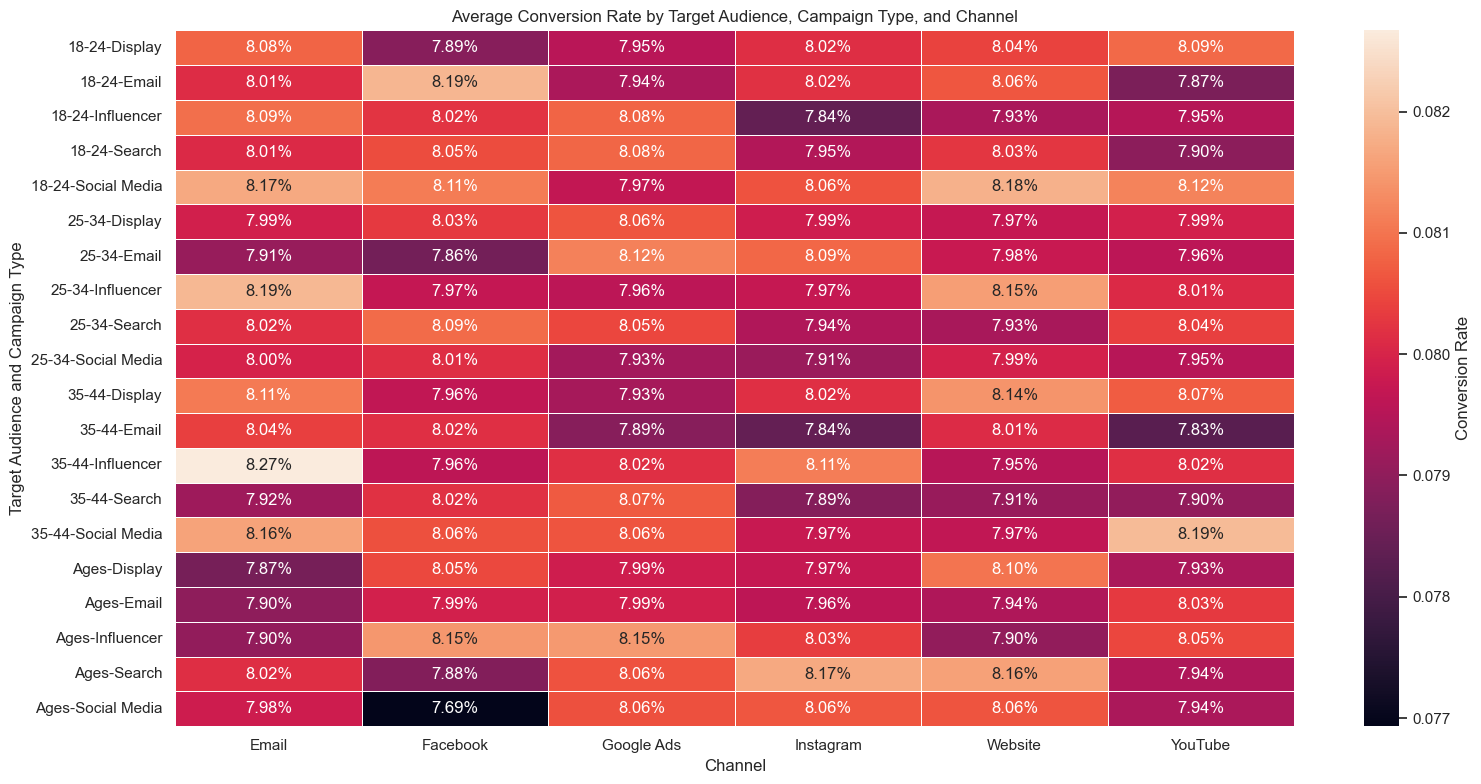

In [79]:
# Average Conversion Rate by Target Audience, Campaign Type, and Channel
avg_conversion_rate_by_3_fields = df.groupby(['Age_Group', 'Campaign_Type', 'Channel_Used'])['Conversion_Rate'].mean().unstack()

# Plot data as a heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(avg_conversion_rate_by_3_fields, annot=True, fmt='.2%', linewidths=0.5, cbar_kws={'label': 'Conversion Rate'})

# Add title and labels
plt.title('Average Conversion Rate by Target Audience, Campaign Type, and Channel')
plt.xlabel('Channel')
plt.xticks(rotation=0)
plt.ylabel('Target Audience and Campaign Type')

# Show plot
plt.tight_layout()
plt.show()

This heatmap visualizes the average conversion rate across different target audiences, campaign types, and channels. Here's a breakdown of what it represents:
* Y-Axis: Lists the target audience and campaign type combinations (e.g., Men 18-24 - Display, Women 25-34 - Search).
* X-Axis: Represents different marketing channels (e.g., Email, Facebook, Google Ads, Instagram, Website, YouTube").
* Color Intensity: Indicates the conversion rate. The lighter the color, the higher the conversion rate, and the darker, the lower the rate. The color bar on the right provides the scale for interpreting conversion rates, ranging from around 7.5% to 8.3%.

### Geographical Distribution - Map Visualization

#### Bar Chart for Campaign Performance by Location

C:\Users\heptu\AppData\Local\Temp\ipykernel_3964\3649763343.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dk, x="Location", y="ROI", ci=None, palette="magma")
C:\Users\heptu\AppData\Local\Temp\ipykernel_3964\3649763343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dk, x="Location", y="ROI", ci=None, palette="magma")


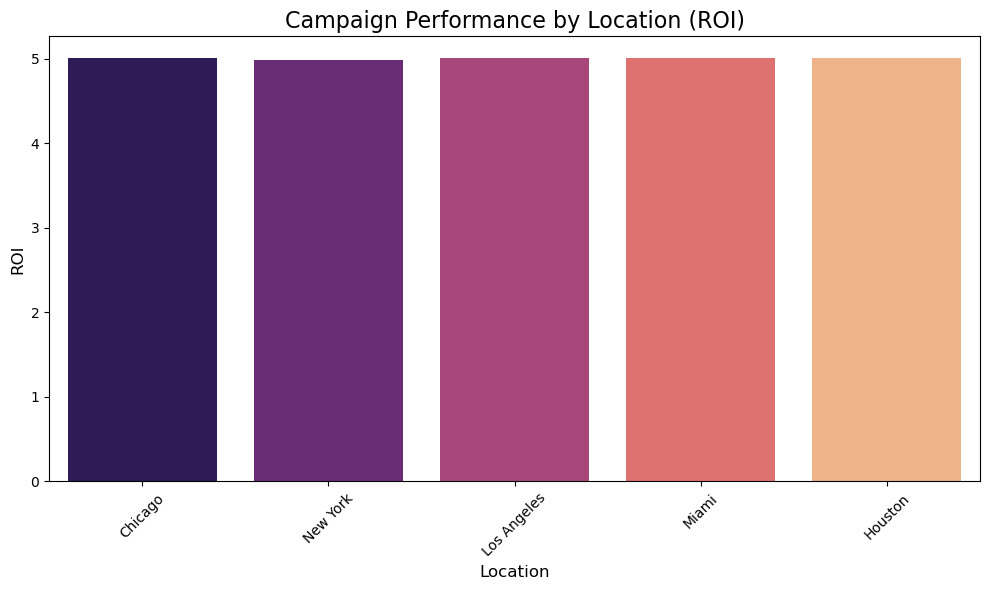

In [16]:
# Bar Chart: Campaign Performance by Location (based on ROI)
plt.figure(figsize=(10, 6))
sns.barplot(data=dk, x="Location", y="ROI", ci=None, palette="magma")
plt.title("Campaign Performance by Location (ROI)", fontsize=16)
plt.xlabel("Location", fontsize=12)
plt.ylabel("ROI", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("l.png")
plt.show()

#### Exploring Location-Based Trends

C:\Users\heptu\AppData\Local\Temp\ipykernel_15944\368594263.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_by_location, x='Location', y='ROI', palette='Set2')


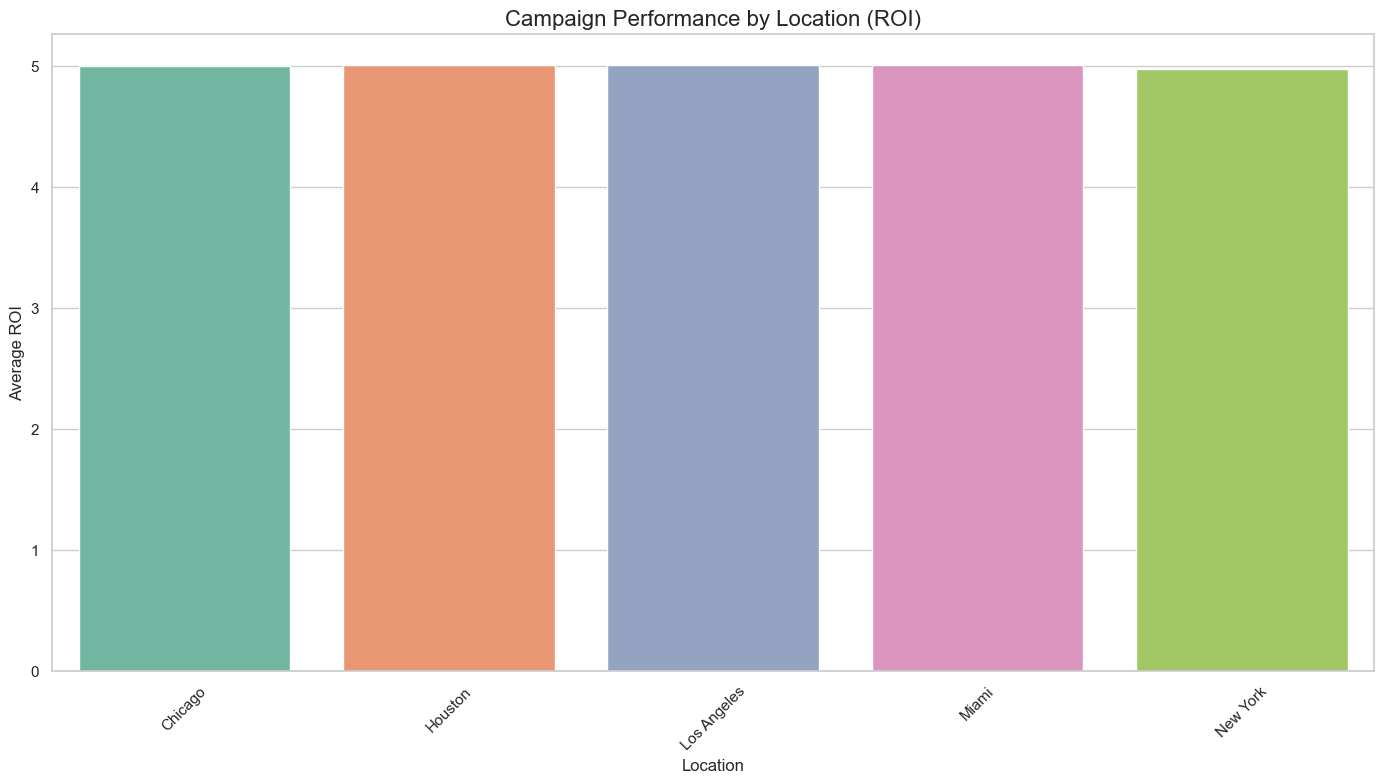

In [48]:
# Group by Location to analyze performance metrics
performance_by_location = dk.groupby('Location').agg({
    'ROI': 'mean',
    'CTR': 'mean',
    'CPC': 'mean',
    'Conversion_Rate': 'mean',
    'Clicks': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Visualize ROI by location
plt.figure(figsize=(14, 8))
sns.barplot(data=performance_by_location, x='Location', y='ROI', palette='Set2')
plt.title("Campaign Performance by Location (ROI)", fontsize=16)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Average ROI", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


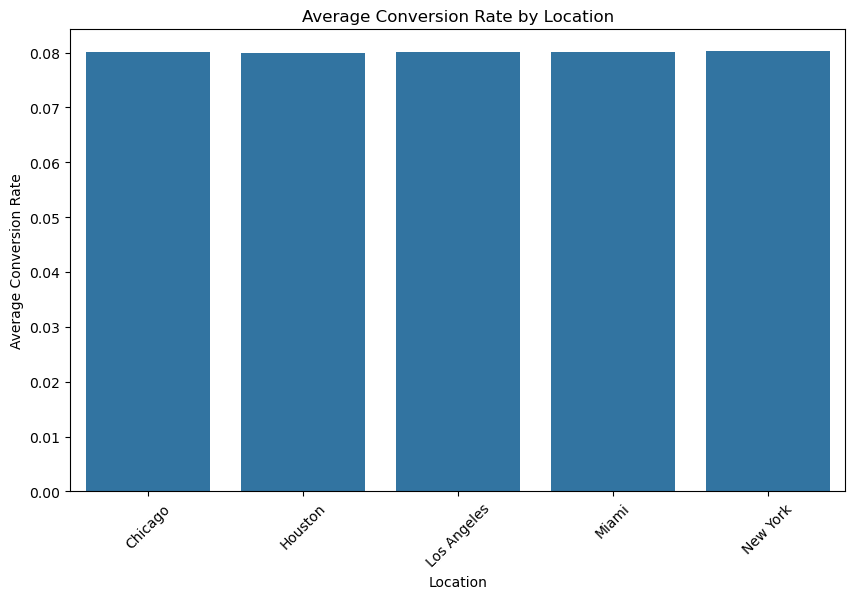

In [17]:
# Group data by location and calculate the average conversion rate
location_conversion = dk.groupby('Location')['Conversion_Rate'].mean().reset_index()

# Create a map plot using the average conversion rate
plt.figure(figsize=(10, 6))
sns.barplot(data=location_conversion, x='Location', y='Conversion_Rate')
plt.title('Average Conversion Rate by Location')
plt.xlabel('Location')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.savefig("m.png")
plt.show()

#### Brand Awareness

In [84]:
# Create a pivot table to see how frequently each channel was used over time
channel_trend = dk.pivot_table(index="Date", columns="Channel_Used", aggfunc="size", fill_value=0)

# Display the table
print(channel_trend.head())  # View the first few rows

# Save as Excel for better viewing
channel_trend.to_excel("Brand_Awareness_Channel_Trend.xlsx")


Channel_Used  Email  Facebook  Google Ads  Instagram  Website  YouTube
Date                                                                  
2021-01-01      120       100          82         80       90       76
2021-01-02       87        83          99         96       85       98
2021-01-03       94        96         100         94       88       76
2021-01-04       91        86          79         88      116       88
2021-01-05       86        97          94        100       92       79


In [86]:
dm = pd.read_excel("Brand_Awareness_Channel_Trend.xlsx")  

# Ensure Date column is in datetime format
dm["Date"] = pd.to_datetime(dm["Date"])

# Sum mentions across all channels per day
dm["Total_Mentions"] = dm.iloc[:, 1:].sum(axis=1)  # Sum all columns except Date

# Calculate Brand Awareness Growth Percentage (Comparing first and last period)
initial_mentions = dm["Total_Mentions"].iloc[0]  # First day's total mentions
final_mentions = dm["Total_Mentions"].iloc[-1]  # Last day's total mentions

brand_awareness_growth = ((final_mentions - initial_mentions) / initial_mentions) * 100

print(f"Brand Awareness Growth: {brand_awareness_growth:.2f}%")


Brand Awareness Growth: -0.18%


In [88]:
# Ensure Date column is in datetime format
dk["Date"] = pd.to_datetime(dk["Date"])

# Convert all channel columns to numeric (handle errors safely)
for col in dk.columns[1:]:  # Excluding Date column
    dk[col] = pd.to_numeric(dk[col], errors="coerce")  # Convert to number, turn errors to NaN

# Sum mentions across all channels per day
dk["Total_Mentions"] = dk.iloc[:, 1:].sum(axis=1)  # Sum all numeric columns except Date

# Calculate Brand Awareness Growth Percentage
initial_mentions = dk["Total_Mentions"].iloc[0]  # First day's total mentions
final_mentions = dk["Total_Mentions"].iloc[-1]  # Last day's total mentions

brand_awareness_growth = ((final_mentions - initial_mentions) / initial_mentions) * 100

print(f"Brand Awareness Growth: {brand_awareness_growth:.2f}%")


Brand Awareness Growth: 1.69%


In [90]:
dk.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Duration', 'Channel_Used',
       'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Location', 'Date',
       'Clicks', 'Impressions', 'Engagement_Score', 'Customer_Segment',
       'Gender', 'Age_Group', 'CTR', 'CPC', 'ROI%', 'Year_Month', 'Year',
       'Month', 'Total_Mentions', 'Conversion'],
      dtype='object')

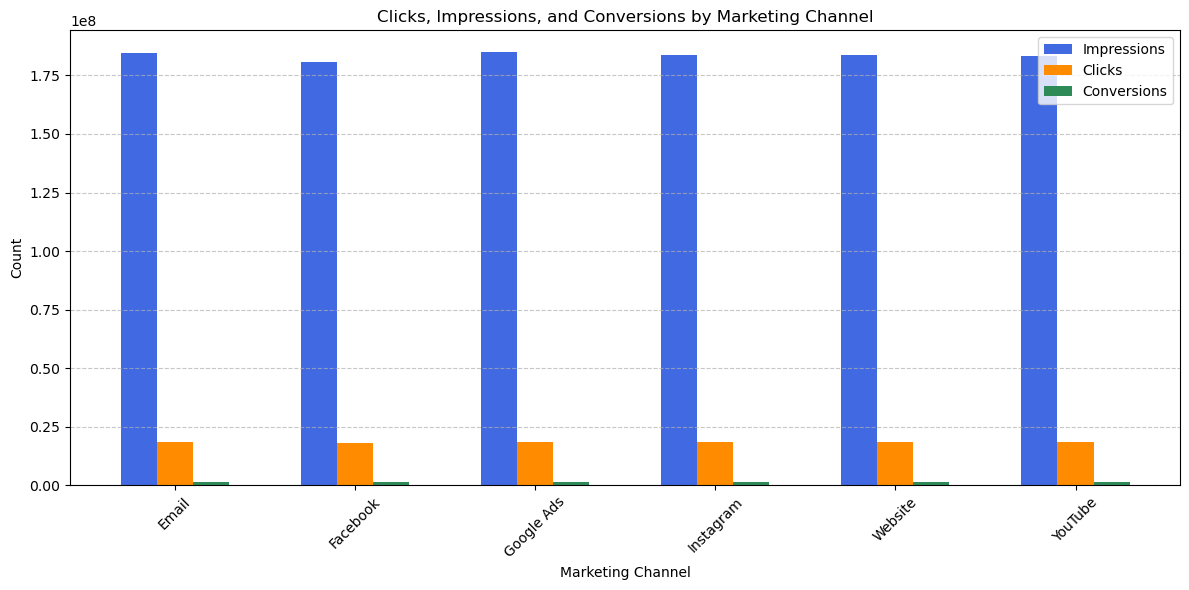

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure numeric conversion
dk["Conversion"] = dk["Conversion_Rate"] * dk["Clicks"]
dk[["Impressions", "Clicks", "Conversion"]] = dk[["Impressions", "Clicks", "Conversion"]].apply(pd.to_numeric, errors="coerce")

# Group by Channel_Used and sum the required metrics
channel_data = dk.groupby("Channel_Used")[["Impressions", "Clicks", "Conversion"]].sum().reset_index()

# Set bar width and positions
bar_width = 0.2
x_labels = np.arange(len(channel_data["Channel_Used"]))

# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each metric
ax.bar(x_labels - bar_width, channel_data["Impressions"], bar_width, label="Impressions", color="royalblue")
ax.bar(x_labels, channel_data["Clicks"], bar_width, label="Clicks", color="darkorange")
ax.bar(x_labels + bar_width, channel_data["Conversion"], bar_width, label="Conversions", color="seagreen")

# Formatting the chart
ax.set_xticks(x_labels)
ax.set_xticklabels(channel_data["Channel_Used"], rotation=45)
plt.xlabel("Marketing Channel")
plt.ylabel("Count")
plt.title("Clicks, Impressions, and Conversions by Marketing Channel")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.savefig("channel.png")
plt.show()


In [12]:
import pandas as pd

# Ensure numeric conversion
dk["Conversion"] = dk["Conversion_Rate"] * dk["Clicks"]
dk[["Impressions", "Clicks", "Conversion"]] = dk[["Impressions", "Clicks", "Conversion"]].apply(pd.to_numeric, errors="coerce")

# Group by Channel_Used and sum the required metrics
channel_data = dk.groupby("Channel_Used")[["Impressions", "Clicks", "Conversion"]].sum().reset_index()

# Display the table
print(channel_data)


  Channel_Used  Impressions    Clicks  Conversion
0        Email    184801107  18493963  1485393.65
1     Facebook    180662496  18038175  1446294.86
2   Google Ads    185020154  18342589  1468813.81
3    Instagram    183738455  18316654  1462864.48
4      Website    183815901  18415351  1477746.31
5      YouTube    183450845  18350935  1463620.81


C:\Users\heptu\AppData\Local\Temp\ipykernel_3964\3752906297.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\heptu\AppData\Local\Temp\ipykernel_3964\3752906297.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("acquis.png")
C:\Users\heptu\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


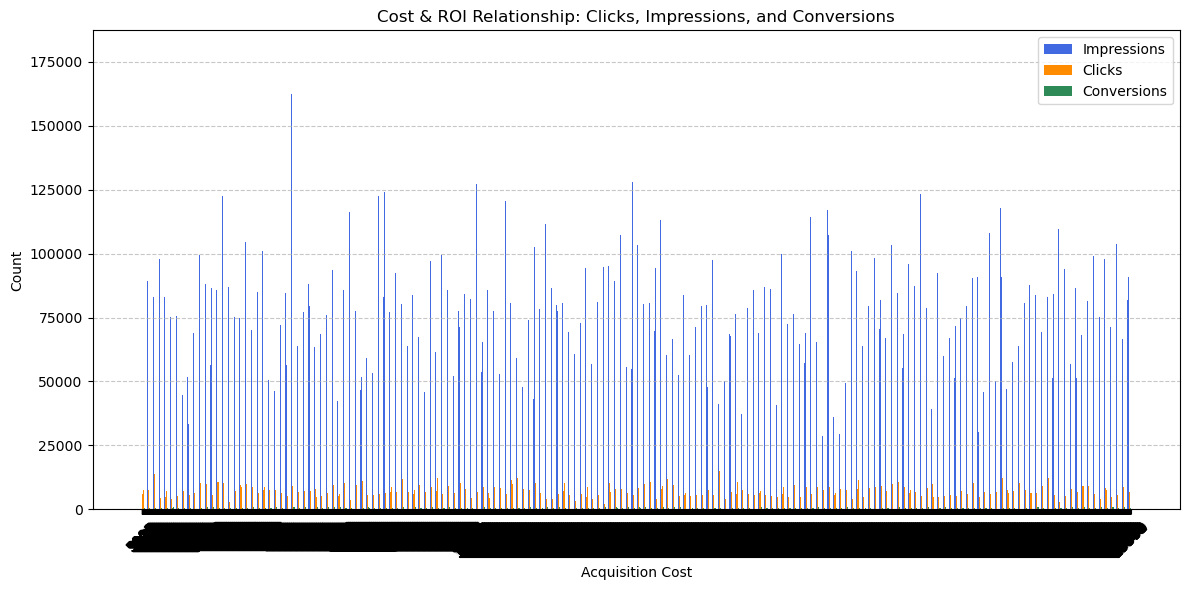

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure numeric conversion
dk[["Impressions", "Clicks", "Conversion", "Acquisition_Cost"]] = dk[["Impressions", "Clicks", "Conversion", "Acquisition_Cost"]].apply(pd.to_numeric, errors="coerce")

# Group by Acquisition_Cost and sum the required metrics
cost_data = dk.groupby("Acquisition_Cost")[["Impressions", "Clicks", "Conversion"]].sum().reset_index()

# Sort by Acquisition_Cost for better visualization
cost_data = cost_data.sort_values(by="Acquisition_Cost")

# Set bar width and positions
bar_width = 0.2
x_labels = np.arange(len(cost_data["Acquisition_Cost"]))

# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each metric
ax.bar(x_labels - bar_width, cost_data["Impressions"], bar_width, label="Impressions", color="royalblue")
ax.bar(x_labels, cost_data["Clicks"], bar_width, label="Clicks", color="darkorange")
ax.bar(x_labels + bar_width, cost_data["Conversion"], bar_width, label="Conversions", color="seagreen")

# Formatting the chart
ax.set_xticks(x_labels)
ax.set_xticklabels(cost_data["Acquisition_Cost"], rotation=45)
plt.xlabel("Acquisition Cost")
plt.ylabel("Count")
plt.title("Cost & ROI Relationship: Clicks, Impressions, and Conversions")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.savefig("acquis.png")
plt.show()


## Conclusion💥

In this analysis, we explored the Marketing Campaign Performance Dataset and gained valuable insights into the effectiveness of various marketing campaigns. Here are the key findings from the analysis:

1. *Campaign Types:* The dataset includes various campaign types such as email, social media, influencer, display, and search. Further analysis can be conducted to evaluate the performance of each campaign type and identify the most effective ones for different customer segments.

2. *Target Audience:* The dataset provides information about the specific audience segments targeted by the campaigns. Understanding the preferences and characteristics of different target audiences can help in tailoring marketing strategies to effectively engage and convert potential customers.

3. *Channel Usage:* The dataset includes information about the channels used to promote the campaigns, such as email, social media platforms, YouTube, websites, and Google Ads. Analyzing channel effectiveness can help in optimizing marketing efforts by focusing on the channels that generate higher conversion rates and engagement.

4. *ROI and Acquisition Cost:* The ROI (Return on Investment) and acquisition cost metrics provide insights into the profitability and cost-efficiency of the campaigns. By analyzing these metrics, marketers can identify the campaigns with the highest ROI and optimize their marketing budget allocation.

5. *Customer Segments:* The dataset categorizes campaigns based on specific customer segments such as tech enthusiasts, fashionistas, health and wellness enthusiasts, foodies, and outdoor adventurers. Understanding the preferences and behavior of different customer segments can aid in creating personalized and targeted marketing campaigns.


By leveraging the insights gained from this analysis, marketers and data analysts can refine their marketing strategies, optimize campaign performance, and drive targeted growth. The findings from this analysis can guide data-driven decision-making and support market research efforts.

The analysis of the marketing campaign's monthly performance reveals a nuanced relationship between engagement scores and return on investment (ROI).
The heatmap visualization effectively highlights the correlation trends, demonstrating that higher engagement scores are generally associated with improved ROI.
This insight underscores the importance of focusing on enhancing engagement strategies to maximize financial returns.
By leveraging these findings, future campaigns can be optimized to drive both higher engagement and better ROI, ultimately contributing to more effective marketing strategies and improved overall performance.